In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
infile = open('real_estate_data_frame','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,localization_y,localization_x,area,sewers,road,fence,water,electricity,gas,price
0,51.835925,19.193010,1004.0,brak,utwardzana,brak,wodociąg w drodze,w drodze,brak,90360.0
1,50.472433,19.233789,18.0,szambo,asfaltowa,żywopłot,wodociąg na działce,na działce,brak,229000.0
2,51.801330,19.189772,1200.0,brak,utwardzana,brak,brak,brak,brak,84000.0
3,53.723500,20.867400,1262.0,brak,utwardzana,brak,własne ujęcie/studnia,brak,brak,88340.0
4,52.094000,20.807400,950.0,brak,utwardzana,brak,brak,brak,brak,295000.0
...,...,...,...,...,...,...,...,...,...,...
7624,49.939618,19.889479,2000.0,brak,polna,brak,brak,brak,brak,360000.0
7625,49.907755,20.200424,35.2,brak,polna,brak,brak,brak,brak,315000.0
7626,50.026720,19.700051,4400.0,szambo,polna,brak,brak,brak,brak,160000.0
7627,49.987773,19.679529,4400.0,brak,polna,brak,brak,brak,brak,440000.0


In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   localization_y  7629 non-null   float64
 1   localization_x  7629 non-null   float64
 2   area            7629 non-null   float64
 3   sewers          7629 non-null   object 
 4   road            7629 non-null   object 
 5   fence           7629 non-null   object 
 6   water           7629 non-null   object 
 7   electricity     7629 non-null   object 
 8   gas             7629 non-null   object 
 9   price           7629 non-null   float64
dtypes: float64(4), object(6)
memory usage: 596.1+ KB


## creating dummy variables

In [5]:
dummies = pd.get_dummies(frame[['sewers','road','fence','water','electricity','gas']],drop_first=True)
frame = frame.drop(['sewers','road','fence','water','electricity','gas'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   localization_y                           7629 non-null   float64
 1   localization_x                           7629 non-null   float64
 2   area                                     7629 non-null   float64
 3   price                                    7629 non-null   float64
 4   sewers_miejska                           7629 non-null   uint8  
 5   sewers_przydomowa oczyszczalnia ścieków  7629 non-null   uint8  
 6   sewers_szambo                            7629 non-null   uint8  
 7   road_kostka brukowa                      7629 non-null   uint8  
 8   road_polna                               7629 non-null   uint8  
 9   road_utwardzana                          7629 non-null   uint8  
 10  fence_brak                               7629 no


#### adjustments for better training

In [7]:
frame = frame.drop(['water_wodociąg na działce','water_wodociąg w drodze','water_własne ujęcie/studnia',
                    'electricity_na działce','electricity_w drodze','gas_na działce','gas_w drodze',
                    'sewers_miejska','sewers_przydomowa oczyszczalnia ścieków','sewers_szambo'],axis=1)

In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   localization_y       7629 non-null   float64
 1   localization_x       7629 non-null   float64
 2   area                 7629 non-null   float64
 3   price                7629 non-null   float64
 4   road_kostka brukowa  7629 non-null   uint8  
 5   road_polna           7629 non-null   uint8  
 6   road_utwardzana      7629 non-null   uint8  
 7   fence_brak           7629 non-null   uint8  
 8   fence_drewniane      7629 non-null   uint8  
 9   fence_inne           7629 non-null   uint8  
 10  fence_metalowe       7629 non-null   uint8  
 11  fence_mieszane       7629 non-null   uint8  
 12  fence_murowane       7629 non-null   uint8  
 13  fence_siatka         7629 non-null   uint8  
 14  fence_żywopłot       7629 non-null   uint8  
dtypes: float64(4), uint8(11)
memory usage:

In [9]:
frame.describe().transpose().loc[['area','price']]

,count,mean,std,min,25%,50%,75%,max
area,7629.0,3881.181342,2.007082e+04,2.86,1059.0,1536.0,3000.0,1515395.0
price,7629.0,584114.250990,1.667238e+06,150.00,114115.0,212750.0,480000.0,60000000.0


##### price

In [10]:
frame.sort_values('price').head(50)

,localization_y,localization_x,area,price,road_kostka brukowa,road_polna,road_utwardzana,fence_brak,fence_drewniane,fence_inne,fence_metalowe,fence_mieszane,fence_murowane,fence_siatka,fence_żywopłot
5640,53.534427,20.675513,1638.0,150.0,0,0,1,0,0,1,0,0,0,0,0
6151,49.651200,19.318500,456.0,3593.0,0,0,1,1,0,0,0,0,0,0,0
6612,49.636800,21.917900,337.0,6000.0,0,1,0,1,0,0,0,0,0,0,0
6613,49.580100,21.824000,700.0,11000.0,0,1,0,1,0,0,0,0,0,0,0
2661,52.320683,18.594914,1023.0,15000.0,0,0,1,1,0,0,0,0,0,0,0
5416,50.210700,20.367700,1530.0,15200.0,0,1,0,1,0,0,0,0,0,0,0
6334,49.467258,22.185891,568.0,19000.0,0,1,0,1,0,0,0,0,0,0,0
3726,52.686932,20.815469,654.0,20000.0,0,1,0,1,0,0,0,0,0,0,0
6395,50.025900,23.195300,953.0,20000.0,0,0,0,1,0,0,0,0,0,0,0
53,52.348380,16.246280,805.0,20125.0,0,0,1,1,0,0,0,0,0,0,0


In [11]:
frame.sort_values('price',ascending=True).head(50)

,localization_y,localization_x,area,price,road_kostka brukowa,road_polna,road_utwardzana,fence_brak,fence_drewniane,fence_inne,fence_metalowe,fence_mieszane,fence_murowane,fence_siatka,fence_żywopłot
5640,53.534427,20.675513,1638.0,150.0,0,0,1,0,0,1,0,0,0,0,0
6151,49.651200,19.318500,456.0,3593.0,0,0,1,1,0,0,0,0,0,0,0
6612,49.636800,21.917900,337.0,6000.0,0,1,0,1,0,0,0,0,0,0,0
6613,49.580100,21.824000,700.0,11000.0,0,1,0,1,0,0,0,0,0,0,0
2661,52.320683,18.594914,1023.0,15000.0,0,0,1,1,0,0,0,0,0,0,0
5416,50.210700,20.367700,1530.0,15200.0,0,1,0,1,0,0,0,0,0,0,0
6334,49.467258,22.185891,568.0,19000.0,0,1,0,1,0,0,0,0,0,0,0
3726,52.686932,20.815469,654.0,20000.0,0,1,0,1,0,0,0,0,0,0,0
6395,50.025900,23.195300,953.0,20000.0,0,0,0,1,0,0,0,0,0,0,0
53,52.348380,16.246280,805.0,20125.0,0,0,1,1,0,0,0,0,0,0,0


In [12]:
len(frame[frame['price']<20000])

7

In [13]:
len(frame[frame['price']>10000000])

34

In [14]:
frame.drop(frame[frame['price']<20000].index,inplace=True)

In [15]:
frame.drop(frame[frame['price']>10000000].index,inplace=True)

##### area

In [16]:
frame.sort_values('area').head(50)

,localization_y,localization_x,area,price,road_kostka brukowa,road_polna,road_utwardzana,fence_brak,fence_drewniane,fence_inne,fence_metalowe,fence_mieszane,fence_murowane,fence_siatka,fence_żywopłot
6228,50.763866,19.160630,2.86,250000.0,0,0,1,1,0,0,0,0,0,0,0
1,50.472433,19.233789,18.00,229000.0,0,0,0,0,0,0,0,0,0,0,1
7529,50.183100,21.944400,21.35,320000.0,0,0,1,1,0,0,0,0,0,0,0
3954,50.095556,20.087500,30.34,699000.0,0,0,0,0,0,0,1,0,0,0,0
3739,49.629402,20.690751,31.96,430000.0,0,0,0,1,0,0,0,0,0,0,0
7625,49.907755,20.200424,35.20,315000.0,0,1,0,1,0,0,0,0,0,0,0
5415,50.267400,22.346600,84.50,294000.0,0,1,0,1,0,0,0,0,0,0,0
6030,49.959492,20.369105,100.00,85000.0,0,1,0,1,0,0,0,0,0,0,0
4291,50.102209,20.124900,100.00,150000.0,0,0,0,1,0,0,0,0,0,0,0
2838,50.106456,20.150476,105.00,155000.0,0,0,0,1,0,0,0,0,0,0,0


In [17]:
frame.sort_values('area',ascending=False).head(50)

,localization_y,localization_x,area,price,road_kostka brukowa,road_polna,road_utwardzana,fence_brak,fence_drewniane,fence_inne,fence_metalowe,fence_mieszane,fence_murowane,fence_siatka,fence_żywopłot
4284,53.970455,14.775268,420000.0,1556000.0,0,1,0,1,0,0,0,0,0,0,0
2046,53.976893,20.746909,282100.0,1250000.0,0,1,0,1,0,0,0,0,0,0,0
5332,53.576787,14.752362,204300.0,470000.0,0,0,0,1,0,0,0,0,0,0,0
6606,50.517657,19.591049,142310.0,7000000.0,0,1,0,1,0,0,0,0,0,0,0
5502,52.629100,16.143400,127349.0,800000.0,0,1,0,1,0,0,0,0,0,0,0
6882,53.410361,20.062835,101485.0,4770000.0,0,1,0,1,0,0,0,0,0,0,0
52,54.202081,22.944269,98920.0,920000.0,0,0,0,1,0,0,0,0,0,0,0
3904,51.132959,23.474677,97003.0,4292700.0,0,0,0,1,0,0,0,0,0,0,0
5851,53.802536,20.416226,90199.0,3300000.0,0,1,0,1,0,0,0,0,0,0,0
3498,52.005438,20.553363,88200.0,2500000.0,0,0,0,1,0,0,0,0,0,0,0


In [18]:
len(frame[frame['area']<250])

25

In [19]:
len(frame[frame['area']>100000])

6

In [20]:
frame.drop(frame[frame['area']<250].index,inplace=True)

In [21]:
frame.drop(frame[frame['area']>100000].index,inplace=True)

In [22]:
frame.describe().transpose().loc[['area','price']]

,count,mean,std,min,25%,50%,75%,max
area,7557.0,3350.829198,6591.182594,250.0,1060.0,1533.0,3000.0,98920.0
price,7557.0,501212.453725,893677.508662,20000.0,114000.0,210000.0,473000.0,10000000.0


### price of $m^{2}$

In [23]:
frame['price_of_sqm'] = frame['price']/frame['area']

In [24]:
frame.describe().transpose().loc[['area','price','price_of_sqm']]

,count,mean,std,min,25%,50%,75%,max
area,7557.0,3350.829198,6591.182594,250.000000,1060.0,1533.0,3000.000000,9.892000e+04
price,7557.0,501212.453725,893677.508662,20000.000000,114000.0,210000.0,473000.000000,1.000000e+07
price_of_sqm,7557.0,222.106600,369.652395,0.793176,65.0,120.0,237.654321,7.331976e+03


In [25]:
frame.sort_values('price_of_sqm').head(50)

,localization_y,localization_x,area,price,road_kostka brukowa,road_polna,road_utwardzana,fence_brak,fence_drewniane,fence_inne,fence_metalowe,fence_mieszane,fence_murowane,fence_siatka,fence_żywopłot,price_of_sqm
1255,49.488152,19.045856,87219.0,69180.0,0,1,0,1,0,0,0,0,0,0,0,0.793176
4262,51.924698,18.673642,14413.0,35560.0,0,1,0,1,0,0,0,0,0,0,0,2.467217
777,49.944831,19.617559,15036.0,46738.0,0,1,0,1,0,0,0,0,0,0,0,3.108406
561,53.038200,23.434900,29600.0,165000.0,0,1,0,1,0,0,0,0,0,0,0,5.574324
3293,54.239305,17.229818,87700.0,490000.0,0,0,0,1,0,0,0,0,0,0,0,5.587229
2654,54.035670,21.770164,35100.0,199000.0,0,1,0,1,0,0,0,0,0,0,0,5.669516
3561,53.838300,17.248200,33872.0,198000.0,0,0,1,1,0,0,0,0,0,0,0,5.845536
5181,53.704367,20.963378,17000.0,100000.0,0,1,0,1,0,0,0,0,0,0,0,5.882353
1636,53.530812,15.014997,50000.0,300000.0,0,0,0,1,0,0,0,0,0,0,0,6.000000
1045,53.268697,15.406203,6400.0,40000.0,0,0,1,1,0,0,0,0,0,0,0,6.250000


In [26]:
frame.sort_values('price_of_sqm',ascending=False).head(100)

,localization_y,localization_x,area,price,road_kostka brukowa,road_polna,road_utwardzana,fence_brak,fence_drewniane,fence_inne,fence_metalowe,fence_mieszane,fence_murowane,fence_siatka,fence_żywopłot,price_of_sqm
1405,54.515017,18.547204,982.0,7200000.0,0,0,0,0,0,0,0,0,0,0,0,7331.975560
186,52.271359,21.062015,401.0,2500000.0,0,0,0,1,0,0,0,0,0,0,0,6234.413965
374,52.183076,20.952235,443.0,2750000.0,0,0,0,0,0,0,0,0,0,1,0,6207.674944
6788,50.058813,19.978134,1464.0,9000000.0,0,0,0,1,0,0,0,0,0,0,0,6147.540984
5565,54.511389,18.545278,1180.0,7200000.0,0,0,0,1,0,0,0,0,0,0,0,6101.694915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,52.240530,21.034167,776.0,1090000.0,0,1,0,1,0,0,0,0,0,0,0,1404.639175
1802,49.290760,19.888786,723.0,1012200.0,0,1,0,1,0,0,0,0,0,0,0,1400.000000
4071,52.174167,21.080278,2000.0,2800000.0,0,0,0,1,0,0,0,0,0,0,0,1400.000000
169,52.204241,20.617786,611.0,850000.0,0,0,1,0,1,0,0,0,0,0,0,1391.162029


In [27]:
len(frame[frame['price_of_sqm']<10])

33

In [28]:
len(frame[frame['price_of_sqm']>1000])

209

In [29]:
frame.drop(frame[frame['price_of_sqm']<10].index,inplace=True)

In [30]:
frame.drop(frame[frame['price_of_sqm']>1000].index,inplace=True)

In [31]:
frame.describe().transpose().loc[['area','price','price_of_sqm']]

,count,mean,std,min,25%,50%,75%,max
area,7315.0,3291.315550,6214.701623,275.0,1079.0,1555.000000,3000.0,97003.0
price,7315.0,455134.174272,808723.472434,20000.0,110000.0,202000.000000,437250.0,10000000.0
price_of_sqm,7315.0,178.068958,175.600436,10.0,65.0,115.176152,220.0,1000.0


## train test split

In [32]:
X = frame.drop('price',axis=1).values
y = frame['price'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train= scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

In [39]:
X_train.shape

(5486, 15)

In [40]:
X_test.shape

(1829, 15)

## creating model 

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [42]:
model = Sequential()

model.add(Dense(16,activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 5

In [44]:
# from tensorflow.keras.callbacks import EarlyStopping

In [45]:
# early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [46]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=10000,
#           callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 5486 samples, validate on 1829 samples
Epoch 1/10000
5486/5486 [==============================] - 1s 128us/sample - loss: 888296197231.6208 - val_loss: 779491633150.8802
Epoch 2/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 888296103980.7977 - val_loss: 779491488319.5452
Epoch 3/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 888295902522.7035 - val_loss: 779491194070.4297
Epoch 4/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 888295328228.5615 - val_loss: 779490181576.8528
Epoch 5/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 888293444934.6495 - val_loss: 779486694517.0127
Epoch 6/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 888286964838.6614 - val_loss: 779474969198.5741
Epoch 7/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 888265433646.4777 - val_loss: 779438260331.4948
Epoch 8/10000
5486/5486 [======================

5486/5486 [==============================] - 0s 6us/sample - loss: 538625571484.2319 - val_loss: 437502785380.3565
Epoch 64/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 530281081415.1163 - val_loss: 429169361984.3849
Epoch 65/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 521043755742.6818 - val_loss: 420754787445.0126
Epoch 66/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 512091585305.6653 - val_loss: 411730757662.2329
Epoch 67/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 502592585805.6493 - val_loss: 403129240672.8573
Epoch 68/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 493186260744.1196 - val_loss: 394294559064.8791
Epoch 69/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 483724494042.3887 - val_loss: 385309381239.5320
Epoch 70/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 474603301300.7772 - val

Epoch 126/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 337904084189.3751 - val_loss: 271217077996.5446
Epoch 127/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 338002452626.3391 - val_loss: 270763427982.2067
Epoch 128/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 337718781053.8068 - val_loss: 270806840409.0191
Epoch 129/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 337451036664.5338 - val_loss: 270558388866.7294
Epoch 130/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 337269842801.0208 - val_loss: 270414386600.9404
Epoch 131/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 338109401629.3051 - val_loss: 270247434328.4593
Epoch 132/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 336991988253.3051 - val_loss: 270077462981.4937
Epoch 133/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 

5486/5486 [==============================] - 0s 6us/sample - loss: 328604770199.4721 - val_loss: 262185666278.9458
Epoch 189/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 328732909385.8228 - val_loss: 261949553792.2099
Epoch 190/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 328401333129.6595 - val_loss: 261717882578.7906
Epoch 191/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 327997956696.2888 - val_loss: 261414756990.2504
Epoch 192/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 327762645979.0419 - val_loss: 261131217925.0388
Epoch 193/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 327235154945.8666 - val_loss: 261240074909.6031
Epoch 194/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 327393964484.4564 - val_loss: 260775280635.5211
Epoch 195/10000
5486/5486 [==============================] - 0s 6us/sample - loss: 326895895782.334

5486/5486 [==============================] - 0s 9us/sample - loss: 304247141446.5563 - val_loss: 240261115158.2548
Epoch 251/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 303635661206.1655 - val_loss: 239901734675.7354
Epoch 252/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 303004665916.4769 - val_loss: 239311361301.1350
Epoch 253/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 302337117654.0022 - val_loss: 238935752471.0946
Epoch 254/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 302170928094.0284 - val_loss: 238689681909.6424
Epoch 255/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 301399919739.5669 - val_loss: 237977343777.1722
Epoch 256/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 300925470195.1207 - val_loss: 237936889262.5391
Epoch 257/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 300231157166.43

5486/5486 [==============================] - 0s 8us/sample - loss: 262253364890.3653 - val_loss: 204456762169.2466
Epoch 313/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 261005796143.3175 - val_loss: 203452319124.7851
Epoch 314/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 260327194319.3759 - val_loss: 202798454820.9513
Epoch 315/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 259540599996.5235 - val_loss: 202218106376.1181
Epoch 316/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 258629549870.9442 - val_loss: 202177700037.0738
Epoch 317/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 257756584210.0124 - val_loss: 200071581308.5708
Epoch 318/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 256314524968.0379 - val_loss: 199378389156.6014
Epoch 319/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 255263457173.978

5486/5486 [==============================] - 0s 8us/sample - loss: 157514090735.6675 - val_loss: 108984116036.4440
Epoch 375/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 154971971921.4758 - val_loss: 107321040735.8775
Epoch 376/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 153120310741.2556 - val_loss: 105287497487.2564
Epoch 377/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 150757528168.7145 - val_loss: 103496807991.1471
Epoch 378/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 148365391751.7929 - val_loss: 102186824748.2296
Epoch 379/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 146540289871.7958 - val_loss: 99519541764.1990
Epoch 380/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 143593545904.2042 - val_loss: 97467948477.0957
Epoch 381/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 141383623937.2133 

5486/5486 [==============================] - 0s 8us/sample - loss: 63257254429.3051 - val_loss: 40364920797.2881
Epoch 438/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 62966136921.5953 - val_loss: 40773245429.0826
Epoch 439/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 61667417456.4608 - val_loss: 39968564549.8436
Epoch 440/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 60710512646.7197 - val_loss: 39467417603.3592
Epoch 441/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 59991777454.3376 - val_loss: 38908637897.2728
Epoch 442/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 59669621692.4302 - val_loss: 38278756983.5320
Epoch 443/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 58903884930.2865 - val_loss: 38516687174.4035
Epoch 444/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 58333288673.4816 - val_loss: 3

5486/5486 [==============================] - 0s 7us/sample - loss: 28341264221.9818 - val_loss: 19665520775.2083
Epoch 501/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 28039405247.6967 - val_loss: 19467086903.4270
Epoch 502/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 27670847914.6978 - val_loss: 19158411497.4653
Epoch 503/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 27372163454.6467 - val_loss: 18986284296.2581
Epoch 504/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 27063271641.4553 - val_loss: 19285067229.0082
Epoch 505/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 26827434454.3755 - val_loss: 19338439544.2318
Epoch 506/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 26618263747.9898 - val_loss: 19848899696.2537
Epoch 507/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 26497599529.0645 - val_loss: 1

5486/5486 [==============================] - 0s 8us/sample - loss: 15224087133.1418 - val_loss: 11472784025.4040
Epoch 564/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 15011424232.1079 - val_loss: 11293021980.1334
Epoch 565/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 15061443286.8421 - val_loss: 12207251715.4992
Epoch 566/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 15171699029.2089 - val_loss: 11149005945.2116
Epoch 567/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 14662947430.8480 - val_loss: 11074939380.8026
Epoch 568/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 14469306949.5297 - val_loss: 11469156089.7015
Epoch 569/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 14377278464.3733 - val_loss: 11194270613.3450
Epoch 570/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 14406225318.9646 - val_loss: 1

Epoch 627/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 10253283257.4437 - val_loss: 8627161959.4358
Epoch 628/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 10218758198.1305 - val_loss: 8835596070.7709
Epoch 629/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 10356840006.9296 - val_loss: 9251403642.7512
Epoch 630/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 10523332815.7492 - val_loss: 8895178673.3384
Epoch 631/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 10568853157.1914 - val_loss: 8788591498.7075
Epoch 632/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 10271923060.9406 - val_loss: 8703172096.5599
Epoch 633/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 10227276193.3649 - val_loss: 8555718965.6074
Epoch 634/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 9996783656.1312 - val

5486/5486 [==============================] - 0s 7us/sample - loss: 8799665969.5574 - val_loss: 7885086218.0776
Epoch 692/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 9150117843.9490 - val_loss: 8277157147.2936
Epoch 693/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 8832232320.5133 - val_loss: 7719045770.8475
Epoch 694/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 8993327446.3288 - val_loss: 7670280214.1148
Epoch 695/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 8620640818.3974 - val_loss: 7633387798.2548
Epoch 696/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 8652152568.6271 - val_loss: 7747958947.2017
Epoch 697/10000
5486/5486 [==============================] - ETA: 0s - loss: 32613425152.000 - 0s 8us/sample - loss: 8779153565.5385 - val_loss: 7629604911.8688
Epoch 698/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 8672258424

5486/5486 [==============================] - 0s 7us/sample - loss: 7629791601.5808 - val_loss: 7268071008.9973
Epoch 756/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 7622059055.0376 - val_loss: 7216642430.9502
Epoch 757/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 7665630501.5180 - val_loss: 7149090777.6490
Epoch 758/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 7582485821.6901 - val_loss: 7150216200.9579
Epoch 759/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 7502489321.1345 - val_loss: 7132728098.5719
Epoch 760/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 7530106742.8071 - val_loss: 7119399458.1520
Epoch 761/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 7519023866.3070 - val_loss: 7181928317.2706
Epoch 762/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 7664597829.9030 - val_loss: 7169825931.1274


5486/5486 [==============================] - 0s 7us/sample - loss: 6917918749.8651 - val_loss: 6836599981.5593
Epoch 820/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6859782690.9982 - val_loss: 6865156352.6998
Epoch 821/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6806073876.3456 - val_loss: 7487178302.4254
Epoch 822/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 7105029541.6580 - val_loss: 7046068113.1460
Epoch 823/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6853818898.1057 - val_loss: 6790682967.6195
Epoch 824/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 6957724587.9110 - val_loss: 7016254240.4724
Epoch 825/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6828588923.3802 - val_loss: 7073388426.9874
Epoch 826/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6848105635.1382 - val_loss: 6859812188.5183


5486/5486 [==============================] - 0s 9us/sample - loss: 6526258174.6001 - val_loss: 7089223479.4270
Epoch 884/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 6559123824.4608 - val_loss: 6681159850.7600
Epoch 885/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6412361514.0911 - val_loss: 7094771249.1285
Epoch 886/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6371639649.3416 - val_loss: 6660140724.4177
Epoch 887/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 6296873901.6843 - val_loss: 6671966295.1996
Epoch 888/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6314553030.6030 - val_loss: 6681451940.6014
Epoch 889/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 6454263411.3540 - val_loss: 6830117166.4691
Epoch 890/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 6460219716.2231 - val_loss: 7048325680.7086


5486/5486 [==============================] - 0s 9us/sample - loss: 6025166596.0131 - val_loss: 6695041273.9814
Epoch 948/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6122984471.3321 - val_loss: 6733000212.1553
Epoch 949/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5942368058.5170 - val_loss: 6761847360.9448
Epoch 950/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6006648696.3004 - val_loss: 6798087578.3838
Epoch 951/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5987414196.3106 - val_loss: 6853400188.0109
Epoch 952/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6134195529.3562 - val_loss: 6721318735.6413
Epoch 953/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5943623883.0828 - val_loss: 6663251427.0268
Epoch 954/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 6151107788.5760 - val_loss: 6841107722.9174


5486/5486 [==============================] - 0s 8us/sample - loss: 5720845034.5345 - val_loss: 7227121620.8901
Epoch 1012/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5872821352.4346 - val_loss: 6593988089.7015
Epoch 1013/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5681763585.3066 - val_loss: 6635988559.3614
Epoch 1014/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5584175330.9748 - val_loss: 7129321810.3007
Epoch 1015/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5722480553.9511 - val_loss: 6838366515.5079
Epoch 1016/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5699003188.1706 - val_loss: 6605028988.2909
Epoch 1017/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5678918109.8418 - val_loss: 6838585910.1673
Epoch 1018/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5610827486.1218 - val_loss: 696778761

5486/5486 [==============================] - 0s 8us/sample - loss: 5600251298.6715 - val_loss: 6411445653.4850
Epoch 1076/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 5473045864.8079 - val_loss: 6677591261.7080
Epoch 1077/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5511531412.8589 - val_loss: 6418663181.9967
Epoch 1078/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 5632698286.1509 - val_loss: 7134571014.7184
Epoch 1079/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5537723003.9402 - val_loss: 6326870131.6129
Epoch 1080/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5386826481.6274 - val_loss: 6392326862.8715
Epoch 1081/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5494173985.1316 - val_loss: 6483655950.2767
Epoch 1082/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5496598531.7331 - val_loss: 642415683

Epoch 1139/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5293994054.5563 - val_loss: 6187255176.6080
Epoch 1140/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5256568185.7937 - val_loss: 6267837088.5424
Epoch 1141/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5202803770.8903 - val_loss: 6215263783.8207
Epoch 1142/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5313414923.4794 - val_loss: 6195432849.2859
Epoch 1143/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 5242447407.3175 - val_loss: 6217188644.3915
Epoch 1144/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5384374752.6416 - val_loss: 6505216399.1864
Epoch 1145/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5451692856.6504 - val_loss: 6261379232.2624
Epoch 1146/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5228596310.6088 - va

5486/5486 [==============================] - 0s 8us/sample - loss: 5385801196.6810 - val_loss: 6231934048.0875
Epoch 1204/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5247016308.9406 - val_loss: 6157642979.9366
Epoch 1205/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5199381477.4947 - val_loss: 6192721560.5642
Epoch 1206/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5090243616.4783 - val_loss: 6181875539.2805
Epoch 1207/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5085659809.4583 - val_loss: 6091637134.4166
Epoch 1208/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5155848128.7233 - val_loss: 6170042861.5943
Epoch 1209/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 5280942984.9129 - val_loss: 6214235779.5692
Epoch 1210/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5233129270.5972 - val_loss: 615899999

5486/5486 [==============================] - 0s 8us/sample - loss: 5206528769.2133 - val_loss: 6358141988.1115
Epoch 1268/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5156213470.9617 - val_loss: 6046555981.1219
Epoch 1269/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4979390205.5735 - val_loss: 6072723671.1296
Epoch 1270/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5245838436.2348 - val_loss: 6015162785.9420
Epoch 1271/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5111789219.6981 - val_loss: 6119395101.1832
Epoch 1272/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5035192785.0558 - val_loss: 6093765765.2488
Epoch 1273/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5219190439.3380 - val_loss: 6387255245.5418
Epoch 1274/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5013502792.5162 - val_loss: 608106025

Epoch 1331/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5134996733.2935 - val_loss: 6602680633.9464
Epoch 1332/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5100550348.3894 - val_loss: 6401164967.4008
Epoch 1333/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 5100316597.8039 - val_loss: 6050221384.5730
Epoch 1334/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4928688613.6814 - val_loss: 5937909273.8239
Epoch 1335/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4930631035.4269 - val_loss: 5917925277.0432
Epoch 1336/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4863731647.2300 - val_loss: 5890871276.0547
Epoch 1337/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4884181868.2610 - val_loss: 5895424079.6413
Epoch 1338/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4857539526.6030 - va

Epoch 1395/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4727620604.9202 - val_loss: 6190222129.6184
Epoch 1396/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4822505467.1469 - val_loss: 5710057078.9721
Epoch 1397/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4784903156.8006 - val_loss: 5723641263.1689
Epoch 1398/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 5047125102.3143 - val_loss: 6374512399.3964
Epoch 1399/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4928991664.9508 - val_loss: 5801990710.7972
Epoch 1400/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4885520206.9559 - val_loss: 5745118394.2963
Epoch 1401/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4677209470.2734 - val_loss: 5769053682.1432
Epoch 1402/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4712054433.8316 - va

5486/5486 [==============================] - 0s 8us/sample - loss: 4667159253.7222 - val_loss: 5687318949.2313
Epoch 1460/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4702483962.9603 - val_loss: 5592076078.7490
Epoch 1461/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4609950124.1910 - val_loss: 5664122268.9732
Epoch 1462/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4564418156.2610 - val_loss: 5640824302.8540
Epoch 1463/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4578008446.6467 - val_loss: 5675377405.2706
Epoch 1464/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4664295998.4367 - val_loss: 5746056870.0011
Epoch 1465/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4697871883.2927 - val_loss: 5896758494.0580
Epoch 1466/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4600643795.2957 - val_loss: 565214706

5486/5486 [==============================] - 0s 8us/sample - loss: 4560444067.3248 - val_loss: 5835750580.9076
Epoch 1524/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4679197960.8662 - val_loss: 5628880074.5325
Epoch 1525/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4482353841.9774 - val_loss: 5683435029.6249
Epoch 1526/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4608356711.4079 - val_loss: 5791093720.2493
Epoch 1527/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4585593224.1662 - val_loss: 5655940946.8606
Epoch 1528/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4636000762.2136 - val_loss: 5568386502.1935
Epoch 1529/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4588289386.3011 - val_loss: 5925024623.0640
Epoch 1530/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4537438862.2326 - val_loss: 556853530

5486/5486 [==============================] - 0s 7us/sample - loss: 4427142989.9293 - val_loss: 5630443277.0869
Epoch 1588/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4471152328.0962 - val_loss: 5421021409.2072
Epoch 1589/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4437027046.3347 - val_loss: 5545865127.8207
Epoch 1590/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4471066909.9584 - val_loss: 5468902130.4932
Epoch 1591/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4512988305.1258 - val_loss: 5474830181.4062
Epoch 1592/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4552284902.2413 - val_loss: 5552702532.8639
Epoch 1593/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4477288666.4820 - val_loss: 5507209840.3237
Epoch 1594/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4501156793.5370 - val_loss: 559316797

5486/5486 [==============================] - 0s 8us/sample - loss: 4907469384.6096 - val_loss: 5781161655.7769
Epoch 1652/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4573425854.9501 - val_loss: 5462386932.2428
Epoch 1653/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4486394262.5388 - val_loss: 5387466756.6189
Epoch 1654/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4327127755.4561 - val_loss: 5709087665.7583
Epoch 1655/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4358717021.7018 - val_loss: 5466919276.8245
Epoch 1656/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4489129004.7043 - val_loss: 5423478103.8294
Epoch 1657/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4372525655.1688 - val_loss: 5687162084.7064
Epoch 1658/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4367968969.2162 - val_loss: 549158594

5486/5486 [==============================] - 0s 8us/sample - loss: 4387109850.7619 - val_loss: 5391651527.8032
Epoch 1716/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4357313632.6883 - val_loss: 5374827026.1957
Epoch 1717/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4455710244.1648 - val_loss: 5489132886.6397
Epoch 1718/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4297483492.4681 - val_loss: 5351285139.5254
Epoch 1719/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4265182635.1644 - val_loss: 5384911569.8808
Epoch 1720/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4310306655.4750 - val_loss: 5498349930.4451
Epoch 1721/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4277620723.1207 - val_loss: 5373007403.2499
Epoch 1722/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4285515262.7867 - val_loss: 535937699

5486/5486 [==============================] - 0s 8us/sample - loss: 4289248365.1010 - val_loss: 5392347560.2406
Epoch 1780/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4256237093.4247 - val_loss: 5280873579.4248
Epoch 1781/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4233679325.1418 - val_loss: 5349500350.2154
Epoch 1782/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4238222170.4353 - val_loss: 5279027878.2110
Epoch 1783/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 4305056944.5775 - val_loss: 5750651256.4418
Epoch 1784/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4453576570.3536 - val_loss: 5634832426.4800
Epoch 1785/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4357823049.5428 - val_loss: 5300176566.8671
Epoch 1786/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4381010830.7926 - val_loss: 52828787

5486/5486 [==============================] - 0s 8us/sample - loss: 4164048149.0922 - val_loss: 5440468448.7873
Epoch 1844/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4195360495.6675 - val_loss: 5564689901.3844
Epoch 1845/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 4297032130.0299 - val_loss: 5610637926.4560
Epoch 1846/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4289925407.9183 - val_loss: 5261595515.9410
Epoch 1847/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4231706770.9923 - val_loss: 5309131751.8557
Epoch 1848/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4267533086.0518 - val_loss: 5233601849.2466
Epoch 1849/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4114658674.5140 - val_loss: 5284767769.6140
Epoch 1850/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4304816857.2687 - val_loss: 55936262

5486/5486 [==============================] - 0s 8us/sample - loss: 4211053680.0875 - val_loss: 5292772360.2581
Epoch 1908/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4130216262.2763 - val_loss: 5224791311.3964
Epoch 1909/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4139158420.2989 - val_loss: 5747593531.6960
Epoch 1910/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4232123400.9595 - val_loss: 5397796745.4478
Epoch 1911/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4167517674.3478 - val_loss: 5219067278.5216
Epoch 1912/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4229362284.8210 - val_loss: 5225366902.4122
Epoch 1913/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4172288463.3759 - val_loss: 6054255095.8819
Epoch 1914/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4570633036.0627 - val_loss: 521790428

5486/5486 [==============================] - 0s 9us/sample - loss: 4056231972.7714 - val_loss: 5123525776.2362
Epoch 1972/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4200345006.8042 - val_loss: 5134302193.4434
Epoch 1973/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4162269020.6752 - val_loss: 5396765732.1115
Epoch 1974/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4192200631.5771 - val_loss: 5363447351.7069
Epoch 1975/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4269911017.4145 - val_loss: 5247671505.8808
Epoch 1976/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4168902748.3019 - val_loss: 5290225822.8628
Epoch 1977/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4093209583.7142 - val_loss: 5153537672.4680
Epoch 1978/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4098896642.5199 - val_loss: 527692723

5486/5486 [==============================] - 0s 8us/sample - loss: 4038207076.2814 - val_loss: 5101894738.2307
Epoch 2036/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4073585682.7590 - val_loss: 5157412189.6381
Epoch 2037/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4033587563.4211 - val_loss: 5066064226.8168
Epoch 2038/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4027354230.0605 - val_loss: 5157971151.5014
Epoch 2039/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4205433223.7463 - val_loss: 5178532739.3592
Epoch 2040/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4062206407.4429 - val_loss: 5124871897.1591
Epoch 2041/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 4119691497.6012 - val_loss: 5106339417.0191
Epoch 2042/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 4194337514.2545 - val_loss: 512446176

5486/5486 [==============================] - 0s 8us/sample - loss: 4042705677.0660 - val_loss: 5159910576.8486
Epoch 2100/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3923139984.5658 - val_loss: 5040434474.5500
Epoch 2101/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4037047037.2935 - val_loss: 5051376105.3253
Epoch 2102/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3973440732.4419 - val_loss: 5025971738.5938
Epoch 2103/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3908219339.3627 - val_loss: 4962677612.5446
Epoch 2104/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3925950454.1072 - val_loss: 4924583490.7644
Epoch 2105/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3920227091.8790 - val_loss: 5040997946.7862
Epoch 2106/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3945761349.5297 - val_loss: 502133751

5486/5486 [==============================] - 0s 8us/sample - loss: 3896424161.1083 - val_loss: 4898005992.0656
Epoch 2164/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3842425499.1119 - val_loss: 4871824342.0098
Epoch 2165/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3905857113.6887 - val_loss: 4895463859.4379
Epoch 2166/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3890422193.7907 - val_loss: 4954143806.5653
Epoch 2167/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3871643300.0715 - val_loss: 4894156526.1542
Epoch 2168/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3951002249.8462 - val_loss: 5145782299.9235
Epoch 2169/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4009514707.2023 - val_loss: 4960573398.0798
Epoch 2170/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3885213563.3802 - val_loss: 509992632

5486/5486 [==============================] - 0s 9us/sample - loss: 3904645780.0190 - val_loss: 4844306293.5724
Epoch 2228/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3964285549.9409 - val_loss: 5087426110.7053
Epoch 2229/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3949102098.2924 - val_loss: 5046817410.0295
Epoch 2230/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3998269731.2782 - val_loss: 5420905144.5467
Epoch 2231/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4062501146.3653 - val_loss: 4979262043.6085
Epoch 2232/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3822044800.3266 - val_loss: 4921649156.3390
Epoch 2233/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3807269529.3387 - val_loss: 4942814300.9382
Epoch 2234/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3776663475.7506 - val_loss: 485575698

5486/5486 [==============================] - 0s 8us/sample - loss: 3888923823.6442 - val_loss: 4798876746.7425
Epoch 2292/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3765866006.6788 - val_loss: 4807348748.8770
Epoch 2293/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3752225153.0733 - val_loss: 4952150180.1115
Epoch 2294/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3788067725.4860 - val_loss: 5085960354.0820
Epoch 2295/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3828622772.2173 - val_loss: 4904604333.2094
Epoch 2296/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 4076083447.8804 - val_loss: 4971240693.0126
Epoch 2297/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3840284242.1291 - val_loss: 4875546690.0645
Epoch 2298/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3991762925.9876 - val_loss: 479883011

5486/5486 [==============================] - 0s 7us/sample - loss: 3676853446.0430 - val_loss: 4787428007.8207
Epoch 2356/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3733847526.6613 - val_loss: 4878279094.0973
Epoch 2357/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3861064165.6814 - val_loss: 4918350939.6085
Epoch 2358/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3874977420.4594 - val_loss: 4737003876.6364
Epoch 2359/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3716564626.3390 - val_loss: 4796488547.1668
Epoch 2360/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3690978585.5720 - val_loss: 4804803797.1001
Epoch 2361/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3672289351.8629 - val_loss: 4733783170.3095
Epoch 2362/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3765579731.2490 - val_loss: 473563108

5486/5486 [==============================] - 0s 9us/sample - loss: 3631923169.2483 - val_loss: 4612569985.1197
Epoch 2420/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3629073741.7426 - val_loss: 4639685595.1186
Epoch 2421/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3632667588.1764 - val_loss: 4680586347.2849
Epoch 2422/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3622643260.2902 - val_loss: 4664190363.9934
Epoch 2423/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3712718704.3675 - val_loss: 4717157370.7512
Epoch 2424/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3620200528.1692 - val_loss: 4787504064.7348
Epoch 2425/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3590075602.9457 - val_loss: 4662891789.2969
Epoch 2426/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3612465196.2844 - val_loss: 469760307

Epoch 2483/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3661844914.6307 - val_loss: 4659729716.2777
Epoch 2484/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3642789987.0215 - val_loss: 4586072052.7326
Epoch 2485/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 3601149558.9471 - val_loss: 4605378353.3384
Epoch 2486/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3588015907.5581 - val_loss: 4553512095.6326
Epoch 2487/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3609436346.5636 - val_loss: 4996567835.1536
Epoch 2488/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3667371439.0842 - val_loss: 4486686782.7053
Epoch 2489/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3528597713.0558 - val_loss: 4554468493.5068
Epoch 2490/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3543349570.7299 - va

Epoch 2547/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3555529210.5869 - val_loss: 4450467983.8163
Epoch 2548/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 3395447902.4484 - val_loss: 4539541696.5249
Epoch 2549/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3482700717.2643 - val_loss: 4512314608.9535
Epoch 2550/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3426627366.7313 - val_loss: 4455765714.4407
Epoch 2551/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3443756958.3784 - val_loss: 4474338619.8360
Epoch 2552/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3542469040.4841 - val_loss: 4643617027.4292
Epoch 2553/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3541880868.3981 - val_loss: 4665097913.6665
Epoch 2554/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3500485820.3369 - v

Epoch 2611/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3380871069.8184 - val_loss: 4376926514.9481
Epoch 2612/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 3422887770.1553 - val_loss: 4487382257.4434
Epoch 2613/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3413003825.0908 - val_loss: 4415285615.7638
Epoch 2614/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3349898933.2439 - val_loss: 4561402897.2160
Epoch 2615/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3398535266.7882 - val_loss: 4497961922.9043
Epoch 2616/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 3385517146.1553 - val_loss: 4597635114.1301
Epoch 2617/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3381589594.6219 - val_loss: 4398530526.4079
Epoch 2618/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3398826698.7094 - 

Epoch 2675/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3466254581.0806 - val_loss: 4397439071.2477
Epoch 2676/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3367715217.1258 - val_loss: 4302172741.6687
Epoch 2677/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3427118059.7477 - val_loss: 4345943816.9929
Epoch 2678/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3301677604.4914 - val_loss: 4564733816.7917
Epoch 2679/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3404666313.7762 - val_loss: 4598183109.7736
Epoch 2680/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3344735586.6949 - val_loss: 4301842434.7644
Epoch 2681/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3330654427.8352 - val_loss: 4487789932.4046
Epoch 2682/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3411207547.1003 - va

Epoch 2739/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3579957853.1418 - val_loss: 4523024159.1427
Epoch 2740/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 3602813466.8786 - val_loss: 4307243282.4057
Epoch 2741/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3389890603.9577 - val_loss: 4249224087.4445
Epoch 2742/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3315506056.3529 - val_loss: 4283867872.3674
Epoch 2743/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3306218681.5370 - val_loss: 4258247254.2548
Epoch 2744/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3359886402.8232 - val_loss: 4522814590.1804
Epoch 2745/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3467997212.3719 - val_loss: 4779612295.6282
Epoch 2746/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3616452023.01

Epoch 2803/10000
5486/5486 [==============================] - 0s 15us/sample - loss: 3304221644.1094 - val_loss: 4272583823.5364
Epoch 2804/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 3383833868.7860 - val_loss: 4613389227.3198
Epoch 2805/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3335706810.4236 - val_loss: 4313225733.1788
Epoch 2806/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3223963786.4995 - val_loss: 4187580002.3619
Epoch 2807/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3388286178.4615 - val_loss: 4592509698.5894
Epoch 2808/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 3494019239.7113 - val_loss: 4303976686.0492
Epoch 2809/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3249120037.0514 - val_loss: 4231816749.6993
Epoch 2810/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3613304627.98

Epoch 2867/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 3253661453.7193 - val_loss: 4300287026.3532
Epoch 2868/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 3393653350.1013 - val_loss: 4155694030.2417
Epoch 2869/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3209674090.1145 - val_loss: 4434596724.8726
Epoch 2870/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3197412726.1538 - val_loss: 4331234875.1361
Epoch 2871/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3345591164.9668 - val_loss: 4089746333.4631
Epoch 2872/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3128798795.7827 - val_loss: 4171726205.0957
Epoch 2873/10000
5486/5486 [==============================] - 0s 13us/sample - loss: 3149331823.1542 - val_loss: 4539580598.9371
Epoch 2874/10000
5486/5486 [==============================] - 0s 15us/sample - loss: 3409212405.36

Epoch 2931/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3253986557.2935 - val_loss: 4191724084.3827
Epoch 2932/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3256068984.7670 - val_loss: 4142917665.9071
Epoch 2933/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3116780062.1451 - val_loss: 4243121714.8781
Epoch 2934/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3180272883.3073 - val_loss: 4885332282.1564
Epoch 2935/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3328328333.4860 - val_loss: 4416953431.7594
Epoch 2936/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3275831859.7040 - val_loss: 4893758303.1077
Epoch 2937/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3221068802.0999 - val_loss: 4231258999.6020
Epoch 2938/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3197725684.2406 - va

Epoch 2995/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3161971869.3518 - val_loss: 4038070861.0519
Epoch 2996/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3006757764.3864 - val_loss: 4052167171.4292
Epoch 2997/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3058757768.7262 - val_loss: 4117814015.4401
Epoch 2998/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3106635811.2782 - val_loss: 4072983176.2931
Epoch 2999/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3045731269.2031 - val_loss: 4037083579.1011
Epoch 3000/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3158835289.4087 - val_loss: 4041948888.9841
Epoch 3001/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3094590921.6828 - val_loss: 4115396065.4522
Epoch 3002/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2986438791.9796 - v

Epoch 3059/10000
5486/5486 [==============================] - 0s 17us/sample - loss: 2995057417.7995 - val_loss: 4068730290.3882
Epoch 3060/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 3132874984.9945 - val_loss: 4435028684.1422
Epoch 3061/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 3075413258.3595 - val_loss: 4048987066.5763
Epoch 3062/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 3156603449.6770 - val_loss: 4089941608.9054
Epoch 3063/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 3102698832.7291 - val_loss: 4319108376.8442
Epoch 3064/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 3097469452.7860 - val_loss: 3953183470.3641
Epoch 3065/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3077437907.2023 - val_loss: 4020918905.0366
Epoch 3066/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3116035666.502

Epoch 3123/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3032320436.3106 - val_loss: 4067518833.6534
Epoch 3124/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2937096061.7135 - val_loss: 3991611047.8557
Epoch 3125/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2916857441.4349 - val_loss: 3949262737.4259
Epoch 3126/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2917585414.0664 - val_loss: 4024959770.9087
Epoch 3127/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 3087915922.4324 - val_loss: 4248221645.7518
Epoch 3128/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 3166619069.9701 - val_loss: 4514322974.0929
Epoch 3129/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3160538763.9927 - val_loss: 4236569914.3663
Epoch 3130/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2923245621.3839 - va

Epoch 3187/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 3017072216.8954 - val_loss: 4031693951.1252
Epoch 3188/10000
5486/5486 [==============================] - 0s 15us/sample - loss: 2996949077.8622 - val_loss: 4078049695.5976
Epoch 3189/10000
5486/5486 [==============================] - 0s 16us/sample - loss: 3005351452.8385 - val_loss: 3909295563.6173
Epoch 3190/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 2857218179.4298 - val_loss: 3907547997.7080
Epoch 3191/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2865180266.5811 - val_loss: 3878422644.2078
Epoch 3192/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2837944844.0860 - val_loss: 3899735883.6698
Epoch 3193/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2938910188.0044 - val_loss: 3956656762.7162
Epoch 3194/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2881620200.64

Epoch 3251/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2890594812.0802 - val_loss: 3896065920.5249
Epoch 3252/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2893306150.2647 - val_loss: 4216326095.5714
Epoch 3253/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 2817966366.9851 - val_loss: 3804904719.4664
Epoch 3254/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2793824109.1476 - val_loss: 3901202318.0317
Epoch 3255/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2908584438.1072 - val_loss: 3866283460.7239
Epoch 3256/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2959376289.4583 - val_loss: 3929828390.7709
Epoch 3257/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2892147255.1571 - val_loss: 3914989724.5533
Epoch 3258/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2823136104.3412 - va

Epoch 3315/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2787568549.7047 - val_loss: 3930546579.0355
Epoch 3316/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2857160443.8935 - val_loss: 3996274324.1203
Epoch 3317/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2753453730.4849 - val_loss: 3771202438.5085
Epoch 3318/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2828043959.5771 - val_loss: 4174200020.9601
Epoch 3319/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2808579453.5735 - val_loss: 3716511260.6583
Epoch 3320/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2760570547.0973 - val_loss: 3706737517.9267
Epoch 3321/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 2727562765.9059 - val_loss: 3919041687.2346
Epoch 3322/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2804036482.2865 - va

Epoch 3379/10000
5486/5486 [==============================] - 0s 18us/sample - loss: 2778093748.1240 - val_loss: 3612419781.5987
Epoch 3380/10000
5486/5486 [==============================] - 0s 16us/sample - loss: 2930138282.6044 - val_loss: 3777645312.7348
Epoch 3381/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 2792827559.1513 - val_loss: 3614580618.3051
Epoch 3382/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 2735058818.0066 - val_loss: 3557079707.3286
Epoch 3383/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 2751290006.2122 - val_loss: 3562733682.3357
Epoch 3384/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2697847418.4470 - val_loss: 3534435940.9163
Epoch 3385/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2662306984.5512 - val_loss: 3517477276.0984
Epoch 3386/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2638053993.8

Epoch 3443/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2598760244.4506 - val_loss: 3511271137.4872
Epoch 3444/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2574364038.5797 - val_loss: 3492894536.3106
Epoch 3445/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2688246133.5939 - val_loss: 3703116446.0230
Epoch 3446/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2595882808.1371 - val_loss: 3484257270.4472
Epoch 3447/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2604225375.6617 - val_loss: 3570664169.6227
Epoch 3448/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2557335432.4929 - val_loss: 3485231843.9016
Epoch 3449/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2605874806.5272 - val_loss: 3531516124.3259
Epoch 3450/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2599256362.3711 - va

Epoch 3507/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2545453146.2486 - val_loss: 3366121465.5265
Epoch 3508/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 2554674335.3117 - val_loss: 3432557952.6823
Epoch 3509/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 2621437150.6817 - val_loss: 3796573872.7436
Epoch 3510/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2697502823.3613 - val_loss: 3465770626.4494
Epoch 3511/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2644268540.4535 - val_loss: 3462393484.7370
Epoch 3512/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2648011324.9435 - val_loss: 3390560341.1700
Epoch 3513/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2663506401.2949 - val_loss: 4282557266.3707
Epoch 3514/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2757606485.2089 -

5486/5486 [==============================] - 0s 8us/sample - loss: 2469166870.9588 - val_loss: 3517958095.3614
Epoch 3571/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2575359335.1746 - val_loss: 3865051162.5238
Epoch 3572/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2531169471.9767 - val_loss: 3510287739.3111
Epoch 3573/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2512788672.7233 - val_loss: 3344816965.7387
Epoch 3574/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2413603984.2392 - val_loss: 3346582632.9404
Epoch 3575/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2502107688.1312 - val_loss: 3341920334.4166
Epoch 3576/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2511095708.7918 - val_loss: 3334108268.6495
Epoch 3577/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2448935475.3773 - val_loss: 339253677

5486/5486 [==============================] - 0s 9us/sample - loss: 2395529693.8418 - val_loss: 3368752336.1662
Epoch 3635/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2515397154.6249 - val_loss: 3392654742.0448
Epoch 3636/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2509606146.9865 - val_loss: 3256606444.8595
Epoch 3637/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2357776660.1823 - val_loss: 3304593872.3062
Epoch 3638/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2420847412.0306 - val_loss: 3439409941.1001
Epoch 3639/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2448295283.1673 - val_loss: 3335670057.8852
Epoch 3640/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2462302762.5578 - val_loss: 3249727134.0755
Epoch 3641/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2413293196.9727 - val_loss: 322982050

5486/5486 [==============================] - 0s 9us/sample - loss: 2446771834.5403 - val_loss: 3233849986.1695
Epoch 3699/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2337914227.1673 - val_loss: 3124788493.4019
Epoch 3700/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2342063509.6055 - val_loss: 3735297508.4265
Epoch 3701/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2435374906.1903 - val_loss: 3120502647.7594
Epoch 3702/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2399181467.7652 - val_loss: 3152653979.8185
Epoch 3703/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2406262990.0226 - val_loss: 3190330253.7168
Epoch 3704/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2470105005.3576 - val_loss: 3273894032.9710
Epoch 3705/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2319241514.4178 - val_loss: 312615538

5486/5486 [==============================] - 0s 17us/sample - loss: 2255377308.7685 - val_loss: 3287150861.2619
Epoch 3763/10000
5486/5486 [==============================] - 0s 16us/sample - loss: 2447435283.5290 - val_loss: 3670403364.6714
Epoch 3764/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 2480598894.3609 - val_loss: 3732632853.4850
Epoch 3765/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2314887217.6507 - val_loss: 3041152302.6266
Epoch 3766/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2257703820.0860 - val_loss: 3038576268.2646
Epoch 3767/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2369909114.6336 - val_loss: 3108711566.1717
Epoch 3768/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2436970782.2151 - val_loss: 3061989075.6129
Epoch 3769/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 2246470478.9559 - val_loss: 3

Epoch 3826/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2212996131.6281 - val_loss: 2815678381.4369
Epoch 3827/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2155110576.1108 - val_loss: 2871209474.5719
Epoch 3828/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2171004752.5425 - val_loss: 2861196532.5052
Epoch 3829/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2113436557.9059 - val_loss: 2941581543.6807
Epoch 3830/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2136643206.1130 - val_loss: 2964576323.0968
Epoch 3831/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2234184628.4973 - val_loss: 3071221019.2236
Epoch 3832/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2273012961.4816 - val_loss: 2935169253.6162
Epoch 3833/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2238955025.5924 - v

Epoch 3890/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2020089195.0478 - val_loss: 2767777814.0798
Epoch 3891/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 2031630403.1965 - val_loss: 2636832393.2728
Epoch 3892/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2081337900.3310 - val_loss: 2756033558.9021
Epoch 3893/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2105452075.9110 - val_loss: 2618613482.5500
Epoch 3894/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2077254413.9993 - val_loss: 2801543378.6506
Epoch 3895/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2073022467.0098 - val_loss: 2694431166.7578
Epoch 3896/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 2107649881.4087 - val_loss: 2727697781.9224
Epoch 3897/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 2095422431.1484 - 

Epoch 3954/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1967416839.3729 - val_loss: 2534568987.6260
Epoch 3955/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1904685539.3482 - val_loss: 2547129411.6217
Epoch 3956/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1986917369.8403 - val_loss: 2454727965.0869
Epoch 3957/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1962750766.6409 - val_loss: 2805815641.9989
Epoch 3958/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1989651180.8443 - val_loss: 2574199088.5161
Epoch 3959/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1944979559.2213 - val_loss: 2487379766.6572
Epoch 3960/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1980746268.8852 - val_loss: 2515548491.2674
Epoch 3961/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1877672862.8451 - 

Epoch 4018/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1883056021.0222 - val_loss: 2502400161.1897
Epoch 4019/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1899818922.2311 - val_loss: 2576616483.5517
Epoch 4020/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1859272463.7725 - val_loss: 2567106733.8218
Epoch 4021/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1894614710.5272 - val_loss: 2559495349.7299
Epoch 4022/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1851831432.2596 - val_loss: 2668936845.4194
Epoch 4023/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1940023385.0354 - val_loss: 2612456906.8650
Epoch 4024/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1824530170.9603 - val_loss: 2507829564.8857
Epoch 4025/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 1823878335.3000 - 

Epoch 4082/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1767330896.3092 - val_loss: 2619164961.5571
Epoch 4083/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1854507461.5764 - val_loss: 2384510982.5697
Epoch 4084/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1883690302.7167 - val_loss: 2476435945.5528
Epoch 4085/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1756421429.6872 - val_loss: 2396746713.8239
Epoch 4086/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1749659817.5312 - val_loss: 2382925924.8726
Epoch 4087/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1834348885.0222 - val_loss: 2410702208.6648
Epoch 4088/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1820637464.8720 - val_loss: 2406418822.8934
Epoch 4089/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1852616897.9599 - va

Epoch 4146/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1931328313.8637 - val_loss: 2584188835.0268
Epoch 4147/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1772534860.7627 - val_loss: 2422820491.1974
Epoch 4148/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1852488383.3234 - val_loss: 2324200926.8015
Epoch 4149/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1704663065.4787 - val_loss: 2469650491.3986
Epoch 4150/10000
5486/5486 [==============================] - 0s 17us/sample - loss: 1774542342.8596 - val_loss: 2334351282.9131
Epoch 4151/10000
5486/5486 [==============================] - 0s 15us/sample - loss: 1862775346.6774 - val_loss: 2389461024.1575
Epoch 4152/10000
5486/5486 [==============================] - 0s 16us/sample - loss: 1724688895.8133 - val_loss: 2305584105.0454
Epoch 4153/10000
5486/5486 [==============================] - 0s 16us/sample - loss: 1690528075.9810 

Epoch 4210/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1741175583.3350 - val_loss: 2474437496.2493
Epoch 4211/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1899665349.1097 - val_loss: 2272914009.3691
Epoch 4212/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1664121813.0689 - val_loss: 2290709543.8032
Epoch 4213/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1771737143.0405 - val_loss: 2346818821.3188
Epoch 4214/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1700794822.4630 - val_loss: 2329483854.3466
Epoch 4215/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1635984917.1506 - val_loss: 2252625800.7042
Epoch 4216/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1688999305.7528 - val_loss: 2263852057.2291
Epoch 4217/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1666069793.8316 - v

Epoch 4274/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1673471441.4524 - val_loss: 2281224055.2521
Epoch 4275/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1668479596.0744 - val_loss: 2250651564.1072
Epoch 4276/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1677897745.0558 - val_loss: 2241190273.6971
Epoch 4277/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1674488526.9092 - val_loss: 2376040362.8999
Epoch 4278/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1766937020.6168 - val_loss: 2304319795.7004
Epoch 4279/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1705550703.2009 - val_loss: 2227094126.5041
Epoch 4280/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1646411927.8454 - val_loss: 2257060472.5293
Epoch 4281/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1631454258.2107 - va

Epoch 4338/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1637331903.6267 - val_loss: 2292483715.2892
Epoch 4339/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1610520389.5297 - val_loss: 2219683978.9787
Epoch 4340/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1619314666.4178 - val_loss: 2224752212.5052
Epoch 4341/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1634447671.4604 - val_loss: 2319219510.3773
Epoch 4342/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1679813954.7415 - val_loss: 2286575379.0443
Epoch 4343/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1815908540.2435 - val_loss: 2383459918.4866
Epoch 4344/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1671314284.9843 - val_loss: 2238721547.6698
Epoch 4345/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1662600337.032

Epoch 4402/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1710522389.8389 - val_loss: 2269094915.7441
Epoch 4403/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1689245675.0944 - val_loss: 2387667774.9328
Epoch 4404/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1654246073.0004 - val_loss: 2234877181.4806
Epoch 4405/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1610793456.6941 - val_loss: 2205219765.0651
Epoch 4406/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1593977173.3489 - val_loss: 2185551107.6217
Epoch 4407/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1604808499.7156 - val_loss: 2157519121.6884
Epoch 4408/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1581505902.0809 - val_loss: 2320474212.7239
Epoch 4409/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1751609196.3544

Epoch 4466/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1603685174.8771 - val_loss: 2209083965.9530
Epoch 4467/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1623402544.7175 - val_loss: 2226781403.6698
Epoch 4468/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1580778248.4229 - val_loss: 2236945326.5041
Epoch 4469/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1550447389.9584 - val_loss: 2156912968.6780
Epoch 4470/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1635404808.0729 - val_loss: 2247016172.3871
Epoch 4471/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1605898299.4036 - val_loss: 2392373912.1793
Epoch 4472/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1596126512.6708 - val_loss: 2199394861.5768
Epoch 4473/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1576404947.5290 - va

Epoch 4530/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1671297814.2822 - val_loss: 2478923883.0049
Epoch 4531/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1708719690.2895 - val_loss: 2434474772.7151
Epoch 4532/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1640672756.8006 - val_loss: 2256023771.2411
Epoch 4533/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1608086905.0937 - val_loss: 2199819732.8551
Epoch 4534/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1630459783.7696 - val_loss: 2192470699.9497
Epoch 4535/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1605509037.6843 - val_loss: 2422735266.7818
Epoch 4536/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1670240778.7794 - val_loss: 2143961522.3969
Epoch 4537/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1598833750.6088 - va

5486/5486 [==============================] - 0s 8us/sample - loss: 1700050683.6136 - val_loss: 2304372130.3270
Epoch 4595/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 1682922331.1236 - val_loss: 2331765098.3051
Epoch 4596/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1581447640.3354 - val_loss: 2100077467.8710
Epoch 4597/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1521827345.0791 - val_loss: 2191825159.4358
Epoch 4598/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1592556206.6642 - val_loss: 2218181594.5850
Epoch 4599/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1624070294.9121 - val_loss: 2071084745.0104
Epoch 4600/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1708569017.9103 - val_loss: 2260222563.5692
Epoch 4601/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1601623322.9953 - val_loss: 210828070

5486/5486 [==============================] - 0s 9us/sample - loss: 1625894074.6569 - val_loss: 2247604654.8540
Epoch 4659/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1538385655.9038 - val_loss: 2106531765.4675
Epoch 4660/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1526174368.2917 - val_loss: 2062876276.3827
Epoch 4661/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1513797942.2238 - val_loss: 2101055531.3024
Epoch 4662/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1610476395.0011 - val_loss: 2128227165.3756
Epoch 4663/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1574861482.6511 - val_loss: 2150504620.5271
Epoch 4664/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1628719408.2975 - val_loss: 2428309343.2477
Epoch 4665/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1581828088.3937 - val_loss: 215303008

5486/5486 [==============================] - 0s 8us/sample - loss: 1468989523.7156 - val_loss: 2204406340.9863
Epoch 4723/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1484182396.0802 - val_loss: 2115078643.5254
Epoch 4724/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1569536241.9774 - val_loss: 2233311519.6501
Epoch 4725/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1526038862.8042 - val_loss: 2444291675.0137
Epoch 4726/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1606814824.1196 - val_loss: 2185762837.4325
Epoch 4727/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1479264270.6759 - val_loss: 2051124249.1416
Epoch 4728/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1497284328.7145 - val_loss: 2139758577.3034
Epoch 4729/10000
5486/5486 [==============================] - 0s 19us/sample - loss: 1505180838.5680 - val_loss: 209276

Epoch 4786/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1495321325.7076 - val_loss: 2128196817.0410
Epoch 4787/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1635969220.5498 - val_loss: 2731797871.7638
Epoch 4788/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1638697612.5410 - val_loss: 2157515888.2712
Epoch 4789/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1499003455.5567 - val_loss: 2057107606.9546
Epoch 4790/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1517812600.3237 - val_loss: 2217472405.4850
Epoch 4791/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1561255548.3602 - val_loss: 2153985439.7201
Epoch 4792/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1484419321.1404 - val_loss: 2123927337.9377
Epoch 4793/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1514798219.1061 - va

5486/5486 [==============================] - 0s 9us/sample - loss: 1480520800.9683 - val_loss: 2050673057.8021
Epoch 4850/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1530223750.9530 - val_loss: 2027719049.3253
Epoch 4851/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1615283681.4116 - val_loss: 2082508042.2526
Epoch 4852/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1637424297.2279 - val_loss: 2213480916.7501
Epoch 4853/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1494044769.9949 - val_loss: 2056032437.0826
Epoch 4854/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1559498747.2636 - val_loss: 2134216409.3866
Epoch 4855/10000
5486/5486 [==============================] - 0s 19us/sample - loss: 1541262304.2450 - val_loss: 2012455408.1312
Epoch 4856/10000
5486/5486 [==============================] - 0s 19us/sample - loss: 1492247682.6599 - val_loss: 217637

Epoch 4913/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1485654969.7937 - val_loss: 2104901724.1159
Epoch 4914/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1479711661.9643 - val_loss: 2077242896.2362
Epoch 4915/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1510739836.1735 - val_loss: 2369428875.9322
Epoch 4916/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1531403660.2027 - val_loss: 1998712849.3034
Epoch 4917/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1494779269.8330 - val_loss: 2232498134.6397
Epoch 4918/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1554246823.0580 - val_loss: 2097534804.9601
Epoch 4919/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1468567550.7634 - val_loss: 2011051366.9284
Epoch 4920/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1425518010.6569 - v

Epoch 4977/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1522815460.5614 - val_loss: 2120241993.9377
Epoch 4978/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1542999426.7532 - val_loss: 2127444601.6665
Epoch 4979/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1703490861.6843 - val_loss: 2196106137.3691
Epoch 4980/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1548960597.6755 - val_loss: 2057040759.0946
Epoch 4981/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1523051406.3726 - val_loss: 2142924123.7485
Epoch 4982/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1528693284.5381 - val_loss: 2037466249.4653
Epoch 4983/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1496722967.3788 - val_loss: 2129573238.8147
Epoch 4984/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1481348181.4189 - v

Epoch 5041/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1448437308.4302 - val_loss: 2032184515.0968
Epoch 5042/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1525972374.3988 - val_loss: 2131620880.1662
Epoch 5043/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1479875426.2749 - val_loss: 2010578402.0295
Epoch 5044/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1422448234.2311 - val_loss: 2114534010.7162
Epoch 5045/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1468551476.9172 - val_loss: 1977782362.4188
Epoch 5046/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1429782159.6325 - val_loss: 1947121636.2340
Epoch 5047/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1463476002.2515 - val_loss: 2047618378.7950
Epoch 5048/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1482359853.2410 -

Epoch 5105/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1468016772.4331 - val_loss: 1975143662.0142
Epoch 5106/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1397871405.5443 - val_loss: 1949199708.2384
Epoch 5107/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1460250279.5829 - val_loss: 2149906890.4625
Epoch 5108/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1523852269.2410 - val_loss: 2057362128.0437
Epoch 5109/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1497004542.5767 - val_loss: 2113991488.5599
Epoch 5110/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1476697154.2632 - val_loss: 2073173368.7042
Epoch 5111/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1413207532.5877 - val_loss: 2059304473.6140
Epoch 5112/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1425403009.2949 - 

Epoch 5169/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1400202221.1127 - val_loss: 2166029053.4806
Epoch 5170/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1413667196.4069 - val_loss: 1968630316.8245
Epoch 5171/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1426031523.9315 - val_loss: 1943861830.0886
Epoch 5172/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1460747185.0674 - val_loss: 2104303530.7600
Epoch 5173/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1466542484.3456 - val_loss: 2000599878.3860
Epoch 5174/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1424230075.7069 - val_loss: 2286597300.2428
Epoch 5175/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1604122971.3219 - val_loss: 2116778242.6594
Epoch 5176/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1476557017.1754 - va

Epoch 5233/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1408487018.6744 - val_loss: 2123538734.5041
Epoch 5234/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1466230652.3602 - val_loss: 2029190939.4686
Epoch 5235/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1416326619.9752 - val_loss: 2126351041.7496
Epoch 5236/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1436668139.4211 - val_loss: 2012199352.3543
Epoch 5237/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1452756274.3974 - val_loss: 2043306363.7660
Epoch 5238/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1486564275.8440 - val_loss: 1948889855.4226
Epoch 5239/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1431506404.3281 - val_loss: 2393670807.1296
Epoch 5240/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1607645102.7576 - va

Epoch 5297/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1391611246.8742 - val_loss: 1985239009.8021
Epoch 5298/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1421230175.1950 - val_loss: 2289909119.0902
Epoch 5299/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1415569477.2964 - val_loss: 1949524951.0771
Epoch 5300/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1360051959.2738 - val_loss: 2122366382.3641
Epoch 5301/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1398052217.5603 - val_loss: 2005312353.2947
Epoch 5302/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1377663697.2191 - val_loss: 1956867012.2865
Epoch 5303/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1364117814.2705 - val_loss: 2000399893.6599
Epoch 5304/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1367872261.2264 - v

5486/5486 [==============================] - 0s 10us/sample - loss: 1579884405.8505 - val_loss: 2278691904.5249
Epoch 5361/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1560927944.0729 - val_loss: 2008481276.3609
Epoch 5362/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1452007898.1086 - val_loss: 2041577734.6134
Epoch 5363/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1404275913.7062 - val_loss: 1988814138.6812
Epoch 5364/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1323136661.3722 - val_loss: 2162396454.0011
Epoch 5365/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1387565379.5698 - val_loss: 2127070408.2231
Epoch 5366/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1378572941.0660 - val_loss: 1954218384.5336
Epoch 5367/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1357005028.8647 - val_loss: 201647

Epoch 5424/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1360508609.3766 - val_loss: 2158799961.0016
Epoch 5425/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1380539730.9223 - val_loss: 1977586865.4434
Epoch 5426/10000
5486/5486 [==============================] - 0s 17us/sample - loss: 1468450425.1870 - val_loss: 2209775338.2351
Epoch 5427/10000
5486/5486 [==============================] - 0s 16us/sample - loss: 1372463114.6861 - val_loss: 1939376770.3095
Epoch 5428/10000
5486/5486 [==============================] - 0s 16us/sample - loss: 1442402710.9588 - val_loss: 2009014440.9929
Epoch 5429/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 1419107316.2173 - val_loss: 1970111181.2269
Epoch 5430/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1428173873.0908 - val_loss: 1929448325.1438
Epoch 5431/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1383770313.40

5486/5486 [==============================] - 0s 13us/sample - loss: 1349928049.3241 - val_loss: 1969008877.6293
Epoch 5488/10000
5486/5486 [==============================] - 0s 21us/sample - loss: 1387212278.4338 - val_loss: 2204757604.0241
Epoch 5489/10000
5486/5486 [==============================] - 0s 17us/sample - loss: 1394146304.3383 - val_loss: 2128529196.8945
Epoch 5490/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1416133880.4871 - val_loss: 1966122836.8901
Epoch 5491/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 1327349151.8717 - val_loss: 2169096609.3647
Epoch 5492/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1468567551.9417 - val_loss: 2263991144.0656
Epoch 5493/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1386680118.9238 - val_loss: 1993861506.9393
Epoch 5494/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1381525414.0080 - val_loss: 1

Epoch 5551/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 1317014095.8425 - val_loss: 2200258077.2356
Epoch 5552/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1377392227.7681 - val_loss: 2056842978.1520
Epoch 5553/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1459019238.8480 - val_loss: 2066423041.2422
Epoch 5554/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1436020316.7918 - val_loss: 2176296496.5511
Epoch 5555/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1393575111.4663 - val_loss: 2030198832.8136
Epoch 5556/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1315507824.4608 - val_loss: 2018845178.4013
Epoch 5557/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1309208776.7029 - val_loss: 1983113963.0574
Epoch 5558/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1293322538.6044 - va

5486/5486 [==============================] - 0s 11us/sample - loss: 1343954346.9311 - val_loss: 2202565452.5271
Epoch 5615/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 1359866233.8753 - val_loss: 1912281352.8179
Epoch 5616/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1329613036.0627 - val_loss: 2241364167.2608
Epoch 5617/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1384183944.7495 - val_loss: 2066142030.5916
Epoch 5618/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1320482860.9610 - val_loss: 2132060009.0454
Epoch 5619/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1347034963.6223 - val_loss: 2107091413.1350
Epoch 5620/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1388900788.4039 - val_loss: 1978498221.1394
Epoch 5621/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1473798256.3208 - val_loss: 211742

5486/5486 [==============================] - 0s 8us/sample - loss: 1293009477.9497 - val_loss: 2061276276.2952
Epoch 5679/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1278224738.7415 - val_loss: 1946644728.5642
Epoch 5680/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1404414885.7980 - val_loss: 2054981562.4713
Epoch 5681/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1355311369.1229 - val_loss: 2039878745.7540
Epoch 5682/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1322244611.3598 - val_loss: 2191892550.7359
Epoch 5683/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1297235050.9894 - val_loss: 1945317252.3915
Epoch 5684/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1349074465.5049 - val_loss: 2340818664.2406
Epoch 5685/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1399097846.7371 - val_loss: 20942287

Epoch 5742/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1340641726.0168 - val_loss: 2124024556.9295
Epoch 5743/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1284759274.1611 - val_loss: 1915264326.5435
Epoch 5744/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1274963092.9989 - val_loss: 2228389515.4423
Epoch 5745/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1292718832.8341 - val_loss: 1972697991.0858
Epoch 5746/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1286285681.4408 - val_loss: 2192006535.9781
Epoch 5747/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1351004331.6661 - val_loss: 2015639620.1990
Epoch 5748/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1277103323.6719 - val_loss: 2003603467.0574
Epoch 5749/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1307497123.2840 -

Epoch 5806/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1321614960.0175 - val_loss: 2136178500.3040
Epoch 5807/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1305897245.1185 - val_loss: 1995285205.6424
Epoch 5808/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1266801739.4094 - val_loss: 2071620360.1706
Epoch 5809/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1361788427.5494 - val_loss: 2140438762.8475
Epoch 5810/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1322985114.1786 - val_loss: 1996747297.2247
Epoch 5811/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1313898891.7594 - val_loss: 2195845845.7299
Epoch 5812/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1343242711.2738 - val_loss: 2079622346.4975
Epoch 5813/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1306411158.6322 - v

Epoch 5870/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1276250424.5454 - val_loss: 2135111439.2564
Epoch 5871/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1270614846.7634 - val_loss: 1921861599.9650
Epoch 5872/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1306665319.0813 - val_loss: 2084407815.0334
Epoch 5873/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1309135574.4688 - val_loss: 2183997934.6966
Epoch 5874/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1426881816.3996 - val_loss: 2351259180.2646
Epoch 5875/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1329159281.1841 - val_loss: 2129287766.1148
Epoch 5876/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1344607725.4043 - val_loss: 2206447237.5462
Epoch 5877/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1263483676.0102 - va

Epoch 5934/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1266709461.4189 - val_loss: 2037285139.2630
Epoch 5935/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1282226304.0000 - val_loss: 2087566254.1542
Epoch 5936/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1229915357.2118 - val_loss: 1996141316.5139
Epoch 5937/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1327811996.8852 - val_loss: 2247979895.8469
Epoch 5938/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1344011742.9851 - val_loss: 1961571441.5659
Epoch 5939/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1249195075.4065 - val_loss: 2122702619.9235
Epoch 5940/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1305379026.1291 - val_loss: 2050029741.8742
Epoch 5941/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1231076405.9905 - v

Epoch 5998/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1274287986.3274 - val_loss: 2207432548.9163
Epoch 5999/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1323986691.9665 - val_loss: 2091803455.1602
Epoch 6000/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1252019364.6781 - val_loss: 1997781035.7397
Epoch 6001/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1222686224.9624 - val_loss: 2005599549.6730
Epoch 6002/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1219365975.6354 - val_loss: 2042788506.3488
Epoch 6003/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1220832293.6464 - val_loss: 1947663300.0416
Epoch 6004/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1231365243.3336 - val_loss: 2143356916.7326
Epoch 6005/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1340018693.5997 - va

Epoch 6062/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1266273593.1170 - val_loss: 2309024152.3893
Epoch 6063/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1295349151.4284 - val_loss: 1984822628.6189
Epoch 6064/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1215913069.4276 - val_loss: 2009261528.2493
Epoch 6065/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1219611354.4820 - val_loss: 1992505931.8972
Epoch 6066/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1255518235.5786 - val_loss: 2163100917.4675
Epoch 6067/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1293600709.3897 - val_loss: 1978337285.4237
Epoch 6068/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1232875852.5993 - val_loss: 2173988413.3406
Epoch 6069/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1321683070.6234 - va

Epoch 6126/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1243485780.0890 - val_loss: 1984236943.2039
Epoch 6127/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1236146065.7324 - val_loss: 1974825227.8447
Epoch 6128/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1225878148.3631 - val_loss: 2094848480.3849
Epoch 6129/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1217251975.2330 - val_loss: 1953640657.6009
Epoch 6130/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1238620937.7062 - val_loss: 2067968081.4959
Epoch 6131/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1221723523.2782 - val_loss: 2086111602.9131
Epoch 6132/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1253167768.1021 - val_loss: 2136915432.5205
Epoch 6133/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1227860823.0521 - va

Epoch 6190/10000
5486/5486 [==============================] - 0s 13us/sample - loss: 1212315822.1976 - val_loss: 2043675665.9858
Epoch 6191/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1317627947.0128 - val_loss: 2085077400.5293
Epoch 6192/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1256947654.2880 - val_loss: 1993679667.5604
Epoch 6193/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1257549852.4652 - val_loss: 2164587563.3548
Epoch 6194/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1251072849.9891 - val_loss: 1975766644.2428
Epoch 6195/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1191981650.1991 - val_loss: 2027590825.9902
Epoch 6196/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1190052958.8217 - val_loss: 2035704309.7474
Epoch 6197/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1321197584.3791 - v

Epoch 6254/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1237102075.8469 - val_loss: 2056061225.3253
Epoch 6255/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1194483579.1003 - val_loss: 2062386490.1564
Epoch 6256/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1183227996.4419 - val_loss: 1927989354.3051
Epoch 6257/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1298438196.2173 - val_loss: 1963837166.9590
Epoch 6258/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1244058939.4036 - val_loss: 2117880674.6419
Epoch 6259/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 1186510662.5447 - val_loss: 2135766680.7567
Epoch 6260/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1238846305.5866 - val_loss: 2134209052.5883
Epoch 6261/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1229061777.5458 - va

Epoch 6318/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1166214971.2636 - val_loss: 1970815266.8693
Epoch 6319/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1162018432.8750 - val_loss: 2111111835.3811
Epoch 6320/10000
5486/5486 [==============================] - ETA: 0s - loss: 1161476480.00 - 0s 8us/sample - loss: 1184140895.9417 - val_loss: 2068799805.7255
Epoch 6321/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1203783685.5997 - val_loss: 2218937904.3587
Epoch 6322/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1184498660.7481 - val_loss: 1954078632.8354
Epoch 6323/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1340333759.2300 - val_loss: 2144614526.6178
Epoch 6324/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1259514872.3704 - val_loss: 2007437139.2455
Epoch 6325/10000
5486/5486 [==============================] - 0s 9us/sam

5486/5486 [==============================] - 0s 9us/sample - loss: 1217609418.4995 - val_loss: 2012663471.7988
Epoch 6382/10000
5486/5486 [==============================] - 0s 19us/sample - loss: 1277519340.2610 - val_loss: 2021355062.3423
Epoch 6383/10000
5486/5486 [==============================] - 0s 17us/sample - loss: 1188410151.8979 - val_loss: 1912890696.6080
Epoch 6384/10000
5486/5486 [==============================] - 0s 17us/sample - loss: 1224287099.9752 - val_loss: 2498624572.2209
Epoch 6385/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1356541078.8188 - val_loss: 2103359123.8054
Epoch 6386/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1224749527.8688 - val_loss: 2035839654.5610
Epoch 6387/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1194900716.8210 - val_loss: 2305915458.4494
Epoch 6388/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1480663185.1258 - val_loss: 21

Epoch 6445/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1130737258.7678 - val_loss: 2060563406.9065
Epoch 6446/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1193454667.5961 - val_loss: 2027071486.0230
Epoch 6447/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1190511950.2093 - val_loss: 2131301201.1810
Epoch 6448/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1170637414.1480 - val_loss: 2110149754.6288
Epoch 6449/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1186464863.9417 - val_loss: 2130260218.9087
Epoch 6450/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1365901711.0725 - val_loss: 2084051510.4472
Epoch 6451/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1348984513.9832 - val_loss: 2033561275.4336
Epoch 6452/10000
5486/5486 [==============================] - 0s 14us/sample - loss: 1196682540.3077 -

5486/5486 [==============================] - 0s 17us/sample - loss: 1175611932.4885 - val_loss: 2171380799.2302
Epoch 6509/10000
5486/5486 [==============================] - 0s 17us/sample - loss: 1155901086.8451 - val_loss: 2054148543.8950
Epoch 6510/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 1198508581.1214 - val_loss: 1996306701.6643
Epoch 6511/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1143942833.0674 - val_loss: 2124244572.1334
Epoch 6512/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1140189834.2195 - val_loss: 1996293091.0093
Epoch 6513/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1197817222.1130 - val_loss: 2095160095.7376
Epoch 6514/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1202084142.1159 - val_loss: 2195001424.4461
Epoch 6515/10000
5486/5486 [==============================] - 0s 20us/sample - loss: 1141841695.7783 - val_loss: 1

Epoch 6572/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1268240721.7557 - val_loss: 2288736586.7775
Epoch 6573/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1465374006.5972 - val_loss: 2131929839.3439
Epoch 6574/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1225321257.0645 - val_loss: 2339109080.0219
Epoch 6575/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1262927090.3157 - val_loss: 2209408927.3177
Epoch 6576/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1151425271.8104 - val_loss: 2047162269.6031
Epoch 6577/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1137376462.6292 - val_loss: 2071032387.9541
Epoch 6578/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1144619793.1958 - val_loss: 2103624065.6096
Epoch 6579/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1147976548.2348

Epoch 6636/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1138721636.0948 - val_loss: 2048882253.8218
Epoch 6637/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1176715459.7331 - val_loss: 2187154374.2985
Epoch 6638/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1125577355.4794 - val_loss: 2103803541.6774
Epoch 6639/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1122963679.0084 - val_loss: 2122039573.3100
Epoch 6640/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1189439176.2829 - val_loss: 2050085276.3434
Epoch 6641/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1169195014.8130 - val_loss: 2027628406.9896
Epoch 6642/10000
5486/5486 [==============================] - 0s 14us/sample - loss: 1155998676.7889 - val_loss: 2202705877.3800
Epoch 6643/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1103535114.7328 - 

Epoch 6700/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 1191796803.7565 - val_loss: 2028319751.3133
Epoch 6701/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1071280275.2723 - val_loss: 2360971292.4133
Epoch 6702/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1173946573.8359 - val_loss: 2106603747.5517
Epoch 6703/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1124535290.7269 - val_loss: 2014153466.9612
Epoch 6704/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1083946095.4809 - val_loss: 2095759217.5134
Epoch 6705/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1081498363.6602 - val_loss: 2050750570.7600
Epoch 6706/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1079857292.4360 - val_loss: 2011805795.9366
Epoch 6707/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1098880798.1451 - 

Epoch 6764/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1127686926.7226 - val_loss: 2043298437.4587
Epoch 6765/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1086699994.1086 - val_loss: 1995324963.4467
Epoch 6766/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1068884836.1181 - val_loss: 1968243045.6512
Epoch 6767/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1064558846.3201 - val_loss: 1980304618.4625
Epoch 6768/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1062585245.4685 - val_loss: 1974565765.4587
Epoch 6769/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1085034680.7904 - val_loss: 1957951046.6484
Epoch 6770/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 1102517249.3066 - val_loss: 2112308260.6714
Epoch 6771/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1083422976.1633 - v

Epoch 6828/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 1067844308.0656 - val_loss: 1913014287.7113
Epoch 6829/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1159332331.8410 - val_loss: 2355530494.7403
Epoch 6830/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 1156417675.8527 - val_loss: 2121199466.7250
Epoch 6831/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1099408136.8429 - val_loss: 1918229513.7452
Epoch 6832/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1023143495.1863 - val_loss: 2066341498.9262
Epoch 6833/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1160775736.0437 - val_loss: 1977203085.2969
Epoch 6834/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 1096341780.6256 - val_loss: 2200413644.0372
Epoch 6835/10000
5486/5486 [==============================] - ETA: 0s - loss: 548185536.000 - 0s 9us/sam

5486/5486 [==============================] - 0s 8us/sample - loss: 1109328942.3609 - val_loss: 2029120405.8699
Epoch 6892/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1086908486.1247 - val_loss: 2423194675.2280
Epoch 6893/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1060284013.5793 - val_loss: 1985824673.6446
Epoch 6894/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 998144008.7262 - val_loss: 2028836535.0771
Epoch 6895/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1004046119.1980 - val_loss: 2150851725.1219
Epoch 6896/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1069804740.8997 - val_loss: 2031921088.5949
Epoch 6897/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1145797073.7791 - val_loss: 1904598122.6375
Epoch 6898/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1001756022.1072 - val_loss: 1913534570

5486/5486 [==============================] - 0s 8us/sample - loss: 985006298.0153 - val_loss: 1807270278.8059
Epoch 6956/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 972159206.9880 - val_loss: 1816923797.0126
Epoch 6957/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 955184945.8141 - val_loss: 1813325312.5249
Epoch 6958/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 926342319.1775 - val_loss: 1965002455.4620
Epoch 6959/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 942816666.1903 - val_loss: 1978445991.7682
Epoch 6960/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 965717459.3657 - val_loss: 1917537750.4647
Epoch 6961/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 947290559.5334 - val_loss: 1903756347.1361
Epoch 6962/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 967515418.9253 - val_loss: 2106855479.2171
E

5486/5486 [==============================] - 0s 8us/sample - loss: 955616150.2122 - val_loss: 1782391439.9213
Epoch 7020/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 904133894.6847 - val_loss: 1807238735.8163
Epoch 7021/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 925417730.4149 - val_loss: 1800623952.2187
Epoch 7022/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 926991253.0222 - val_loss: 1823662843.4861
Epoch 7023/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 937052092.0569 - val_loss: 1742666027.9497
Epoch 7024/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 898007589.6814 - val_loss: 1725474017.8896
Epoch 7025/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 913504496.8808 - val_loss: 1893330854.9809
Epoch 7026/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 1051497109.5355 - val_loss: 2030759306.9874


5486/5486 [==============================] - 0s 8us/sample - loss: 827130758.6147 - val_loss: 1682050023.7682
Epoch 7084/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 853021126.5797 - val_loss: 1737648954.4013
Epoch 7085/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 861989420.6110 - val_loss: 1752952357.3188
Epoch 7086/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 917650714.2953 - val_loss: 1973478471.2083
Epoch 7087/10000
5486/5486 [==============================] - 0s 17us/sample - loss: 829811428.2348 - val_loss: 1726251379.5954
Epoch 7088/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 844149446.3697 - val_loss: 1628239874.5194
Epoch 7089/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 888308961.9949 - val_loss: 1672588293.7736
Epoch 7090/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 811032997.5647 - val_loss: 1806499040.69

5486/5486 [==============================] - 0s 10us/sample - loss: 825851541.1389 - val_loss: 1546536185.4390
Epoch 7148/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 861647015.1280 - val_loss: 1659311237.5287
Epoch 7149/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 813208243.5173 - val_loss: 1569409473.0323
Epoch 7150/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 789809829.0514 - val_loss: 1651871994.5413
Epoch 7151/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 795807401.2629 - val_loss: 1570329583.9913
Epoch 7152/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 819390002.9107 - val_loss: 1777504656.9010
Epoch 7153/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 798643750.0080 - val_loss: 1792635881.4653
Epoch 7154/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 891120854.8421 - val_loss: 1531939504.5511

5486/5486 [==============================] - 0s 17us/sample - loss: 800698661.9147 - val_loss: 1601923897.7715
Epoch 7212/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 819068125.3285 - val_loss: 1532677850.5588
Epoch 7213/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 826140711.2446 - val_loss: 1603011103.5276
Epoch 7214/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 839670017.3999 - val_loss: 1773612641.5221
Epoch 7215/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 799036689.0791 - val_loss: 1508415830.3948
Epoch 7216/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 806803703.5654 - val_loss: 1521698246.4735
Epoch 7217/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 783945314.4615 - val_loss: 1529271676.0459
Epoch 7218/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 810335663.0725 - val_loss: 1536401852

5486/5486 [==============================] - 0s 10us/sample - loss: 805831512.2421 - val_loss: 1544692148.4527
Epoch 7276/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 800217940.3223 - val_loss: 1744795803.4861
Epoch 7277/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 819477036.0744 - val_loss: 1552825342.7403
Epoch 7278/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 879879550.8101 - val_loss: 1873006000.1487
Epoch 7279/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 947106970.1203 - val_loss: 1646530284.2646
Epoch 7280/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 903789140.8822 - val_loss: 1568065596.6058
Epoch 7281/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 781300399.8075 - val_loss: 1557916991.1252
Epoch 7282/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 800950458.0970 - val_loss: 1578487593.2028


5486/5486 [==============================] - 0s 8us/sample - loss: 757718084.0365 - val_loss: 1441026856.2756
Epoch 7340/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 748496108.6810 - val_loss: 1449764215.4620
Epoch 7341/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 837123108.7948 - val_loss: 1711665965.9792
Epoch 7342/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 900574428.2552 - val_loss: 1571577993.6927
Epoch 7343/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 785231549.6901 - val_loss: 1506589725.7780
Epoch 7344/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 784980084.1706 - val_loss: 1605470546.0033
Epoch 7345/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 735340437.3722 - val_loss: 1502890825.8327
Epoch 7346/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 797460051.1323 - val_loss: 1552201510.1061
E

5486/5486 [==============================] - 0s 9us/sample - loss: 837798765.0543 - val_loss: 1404623347.2630
Epoch 7404/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 711370521.8053 - val_loss: 1365284109.4019
Epoch 7405/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 738052986.9369 - val_loss: 1743861588.5752
Epoch 7406/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 755319418.7969 - val_loss: 1388579238.3335
Epoch 7407/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 743827048.7029 - val_loss: 1357391324.2034
Epoch 7408/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 724915500.7743 - val_loss: 1366581771.4773
Epoch 7409/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 765070557.7018 - val_loss: 1381992505.1941
Epoch 7410/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 722549390.9092 - val_loss: 1389864324.2165
E

5486/5486 [==============================] - 0s 9us/sample - loss: 746787045.8097 - val_loss: 1402083729.2510
Epoch 7468/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 716668857.5078 - val_loss: 1351243780.4090
Epoch 7469/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 686473350.4863 - val_loss: 1471309139.6654
Epoch 7470/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 789964460.2844 - val_loss: 1394419611.1361
Epoch 7471/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 755879900.0219 - val_loss: 1314135724.5970
Epoch 7472/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 793690126.7226 - val_loss: 1497655126.4297
Epoch 7473/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 867699687.4079 - val_loss: 1413856879.0290
Epoch 7474/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 769364417.9599 - val_loss: 1348416990.4079
E

5486/5486 [==============================] - 0s 9us/sample - loss: 720198079.4400 - val_loss: 1456091646.4954
Epoch 7532/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 709657648.2042 - val_loss: 1189199849.6752
Epoch 7533/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 733024033.8549 - val_loss: 1302807241.2553
Epoch 7534/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 691034488.7670 - val_loss: 1276262123.4773
Epoch 7535/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 706244250.9369 - val_loss: 1258487245.5243
Epoch 7536/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 723732797.2235 - val_loss: 1256103851.1799
Epoch 7537/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 736694188.5643 - val_loss: 1237045725.0957
Epoch 7538/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 688397292.8210 - val_loss: 1303435395.8316


5486/5486 [==============================] - 0s 9us/sample - loss: 660374362.0386 - val_loss: 1214788070.9634
Epoch 7596/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 659157273.6420 - val_loss: 1276070062.8365
Epoch 7597/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 848215256.4521 - val_loss: 1446947872.4374
Epoch 7598/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 758193121.3183 - val_loss: 1327518339.0093
Epoch 7599/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 690557024.8983 - val_loss: 1224162776.0219
Epoch 7600/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 663044428.3660 - val_loss: 1269654052.6014
Epoch 7601/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 657480626.8407 - val_loss: 1187938911.0027
Epoch 7602/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 695109873.9307 - val_loss: 1198127660.4396


5486/5486 [==============================] - 0s 10us/sample - loss: 701770288.6708 - val_loss: 1110660452.8114
Epoch 7660/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 729399039.0201 - val_loss: 1294428535.9519
Epoch 7661/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 687905276.0569 - val_loss: 1202464862.5828
Epoch 7662/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 691794792.2012 - val_loss: 1189945391.5888
Epoch 7663/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 664314573.7659 - val_loss: 1230428999.8382
Epoch 7664/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 711535617.1666 - val_loss: 1782921193.0454
Epoch 7665/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 859055282.6540 - val_loss: 1247610232.0044
Epoch 7666/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 746006502.8246 - val_loss: 1413319879.8907


5486/5486 [==============================] - 0s 8us/sample - loss: 656949121.3999 - val_loss: 1217012864.3149
Epoch 7724/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 664360642.7765 - val_loss: 1208131358.2329
Epoch 7725/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 669968451.8265 - val_loss: 1339868240.1137
Epoch 7726/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 728116168.3062 - val_loss: 1231754049.9770
Epoch 7727/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 680300596.8006 - val_loss: 1178598152.1181
Epoch 7728/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 654413264.3791 - val_loss: 1178414173.5856
Epoch 7729/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 641675061.0572 - val_loss: 1226509278.9940
Epoch 7730/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 643410951.9563 - val_loss: 1157986283.5473


5486/5486 [==============================] - 0s 11us/sample - loss: 671203089.1374 - val_loss: 1256442216.3455
Epoch 7788/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 707598361.9453 - val_loss: 1130089347.7004
Epoch 7789/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 693682916.0248 - val_loss: 1239739739.8185
Epoch 7790/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 658679364.9697 - val_loss: 1238686626.7294
Epoch 7791/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 652052450.5082 - val_loss: 1317212063.8250
Epoch 7792/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 666713467.0653 - val_loss: 1262417514.6550
Epoch 7793/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 689901927.1980 - val_loss: 1290323677.0607
Epoch 7794/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 700807902.9384 - val_loss: 1346300782.766

5486/5486 [==============================] - 0s 8us/sample - loss: 727878134.2005 - val_loss: 1247685185.4347
Epoch 7852/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 679838800.0758 - val_loss: 1289682242.7818
Epoch 7853/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 631842851.6281 - val_loss: 1192688674.6419
Epoch 7854/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 638871191.5538 - val_loss: 1129561825.0498
Epoch 7855/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 622712268.5410 - val_loss: 1197213778.0033
Epoch 7856/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 618136617.7412 - val_loss: 1145947356.3609
Epoch 7857/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 631843421.2118 - val_loss: 1196080572.5883
Epoch 7858/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 646028344.3587 - val_loss: 1194924327.1908
E

5486/5486 [==============================] - 0s 8us/sample - loss: 659496809.3678 - val_loss: 1244721853.0257
Epoch 7916/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 662615776.0583 - val_loss: 1195711363.4817
Epoch 7917/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 649140222.0634 - val_loss: 1244324917.0826
Epoch 7918/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 708065990.1363 - val_loss: 1339680413.6031
Epoch 7919/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 736686002.7240 - val_loss: 1246754090.4276
Epoch 7920/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 653115627.8177 - val_loss: 1161702415.0552
Epoch 7921/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 637065186.3449 - val_loss: 1202377609.3603
Epoch 7922/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 641199139.6165 - val_loss: 1415080340.0503
E

5486/5486 [==============================] - 0s 8us/sample - loss: 619200948.4039 - val_loss: 1259538756.0328
Epoch 7980/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 664762578.0591 - val_loss: 1390349678.9065
Epoch 7981/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 701285568.8400 - val_loss: 1177431512.2843
Epoch 7982/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 688376062.1801 - val_loss: 1086743149.4369
Epoch 7983/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 670787781.1797 - val_loss: 1150243815.8557
Epoch 7984/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 635325981.4918 - val_loss: 1126817282.5544
Epoch 7985/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 628470781.2235 - val_loss: 1193700241.5659
Epoch 7986/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 702530849.5983 - val_loss: 1210184978.0033
E

5486/5486 [==============================] - 0s 8us/sample - loss: 621936113.4758 - val_loss: 1131952771.6304
Epoch 8044/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 615997689.5837 - val_loss: 1259252923.3111
Epoch 8045/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 642249461.2089 - val_loss: 1183416823.6195
Epoch 8046/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 678825084.5935 - val_loss: 1177820508.3958
Epoch 8047/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 609491412.7656 - val_loss: 1145669361.1810
Epoch 8048/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 708225084.8735 - val_loss: 1139160723.1143
Epoch 8049/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 650981059.3598 - val_loss: 1142033571.8316
Epoch 8050/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 641050963.9023 - val_loss: 1225792016.8486
E

5486/5486 [==============================] - 0s 9us/sample - loss: 643103297.0733 - val_loss: 1106130273.5659
Epoch 8108/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 791196485.7864 - val_loss: 1366910950.5260
Epoch 8109/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 655324214.7371 - val_loss: 1204901730.9918
Epoch 8110/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 613367107.7798 - val_loss: 1293787688.6342
Epoch 8111/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 620373193.5662 - val_loss: 1161633262.7840
Epoch 8112/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 605252329.5545 - val_loss: 1163270987.1624
Epoch 8113/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 711070084.5498 - val_loss: 1226226864.5336
Epoch 8114/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 615878341.9730 - val_loss: 1214887686.5960


5486/5486 [==============================] - 0s 8us/sample - loss: 631522152.5279 - val_loss: 1176356361.4828
Epoch 8172/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 630187323.6602 - val_loss: 1202944388.3915
Epoch 8173/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 640539575.9271 - val_loss: 1167466208.4899
Epoch 8174/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 614731628.5410 - val_loss: 1104170317.9442
Epoch 8175/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 683274874.5170 - val_loss: 1241756377.8152
Epoch 8176/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 818822333.4568 - val_loss: 1287582106.9612
Epoch 8177/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 639139430.7546 - val_loss: 1132087383.3308
Epoch 8178/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 639278148.3164 - val_loss: 1158599576.4155
E

5486/5486 [==============================] - 0s 9us/sample - loss: 666735683.6398 - val_loss: 1177494921.9464
Epoch 8236/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 651476770.3682 - val_loss: 1296465032.3630
Epoch 8237/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 732366273.4233 - val_loss: 1303128804.6714
Epoch 8238/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 710295351.3088 - val_loss: 1088851538.1957
Epoch 8239/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 614906058.6044 - val_loss: 1138526857.6052
Epoch 8240/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 603562297.2045 - val_loss: 1110984740.3390
Epoch 8241/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 628660918.3405 - val_loss: 1278994528.1400
Epoch 8242/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 685747610.4353 - val_loss: 1309249365.7649
E

5486/5486 [==============================] - 0s 8us/sample - loss: 659164058.1086 - val_loss: 1134163259.3548
Epoch 8300/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 628651163.1586 - val_loss: 1108052165.8086
Epoch 8301/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 653323223.5421 - val_loss: 1139076927.8688
Epoch 8302/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 636692736.5366 - val_loss: 1106552636.6933
Epoch 8303/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 593453403.8469 - val_loss: 1101629830.6309
Epoch 8304/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 582003945.0412 - val_loss: 1249440626.1957
Epoch 8305/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 645959691.7127 - val_loss: 1089125373.0607
Epoch 8306/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 709954272.5250 - val_loss: 1176429755.2411


5486/5486 [==============================] - 0s 12us/sample - loss: 664210673.7441 - val_loss: 1195735303.2258
Epoch 8364/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 669718826.6511 - val_loss: 1236849428.5227
Epoch 8365/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 639227336.2596 - val_loss: 1139672393.6227
Epoch 8366/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 609688327.6879 - val_loss: 1102134566.0098
Epoch 8367/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 598156563.3657 - val_loss: 1241187723.5648
Epoch 8368/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 614822419.2023 - val_loss: 1134084995.8578
Epoch 8369/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 597317059.9548 - val_loss: 1164912128.1400
Epoch 8370/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 601389784.1021 - val_loss: 1236445012.662

5486/5486 [==============================] - 0s 8us/sample - loss: 652129894.4980 - val_loss: 1100645829.9136
Epoch 8428/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 594022988.9027 - val_loss: 1139957347.5167
Epoch 8429/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 596017892.1181 - val_loss: 1083970911.4401
Epoch 8430/10000
5486/5486 [==============================] - 0s 7us/sample - loss: 641558943.1017 - val_loss: 1287502371.0968
Epoch 8431/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 613886789.0981 - val_loss: 1143780645.9224
Epoch 8432/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 605995058.4907 - val_loss: 1167055474.1083
Epoch 8433/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 653515723.0361 - val_loss: 1195133120.3149
Epoch 8434/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 624499667.3073 - val_loss: 1083090145.4347
E

5486/5486 [==============================] - 0s 9us/sample - loss: 600484504.3821 - val_loss: 1240824819.7179
Epoch 8492/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 600000663.8454 - val_loss: 1101918449.6184
Epoch 8493/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 619304700.8968 - val_loss: 1109778738.7119
Epoch 8494/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 572864148.5789 - val_loss: 1157339834.0426
Epoch 8495/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 599855108.6781 - val_loss: 1224587853.5943
Epoch 8496/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 596619431.2213 - val_loss: 1180285214.5128
Epoch 8497/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 590139560.8312 - val_loss: 1107699245.7518
Epoch 8498/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 613418258.1757 - val_loss: 1133334556.7983
E

5486/5486 [==============================] - 0s 9us/sample - loss: 614775466.7911 - val_loss: 1102720969.2466
Epoch 8556/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 636465777.0091 - val_loss: 1128862999.2958
Epoch 8557/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 705193473.1666 - val_loss: 1087454701.3319
Epoch 8558/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 600235909.5180 - val_loss: 1102839090.5719
Epoch 8559/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 586740448.3383 - val_loss: 1100557340.0897
Epoch 8560/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 603774368.2217 - val_loss: 1061575476.6364
Epoch 8561/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 570149679.0142 - val_loss: 1065911109.5987
Epoch 8562/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 594637090.7182 - val_loss: 1117898109.7693
E

5486/5486 [==============================] - 0s 8us/sample - loss: 618671287.5538 - val_loss: 1218372620.9557
Epoch 8620/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 590256691.8906 - val_loss: 1083473083.4336
Epoch 8621/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 640180059.1586 - val_loss: 1140413584.3149
Epoch 8622/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 644906057.7412 - val_loss: 1134275322.1214
Epoch 8623/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 585037914.8319 - val_loss: 1096564358.6572
Epoch 8624/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 667252504.0787 - val_loss: 1084846576.4724
Epoch 8625/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 605466873.7703 - val_loss: 1101308732.9470
Epoch 8626/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 618244067.2548 - val_loss: 1152369026.2395
E

5486/5486 [==============================] - 0s 9us/sample - loss: 759319772.1269 - val_loss: 1431216902.6484
Epoch 8684/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 737771254.8188 - val_loss: 1409549513.5178
Epoch 8685/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 726240319.4400 - val_loss: 1359527178.0077
Epoch 8686/10000
5486/5486 [==============================] - 0s 15us/sample - loss: 643975977.0412 - val_loss: 1139914006.8584
Epoch 8687/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 642048462.8392 - val_loss: 1129653109.4325
Epoch 8688/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 627774266.3420 - val_loss: 1229119200.4899
Epoch 8689/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 639677194.7911 - val_loss: 1222014425.8764
Epoch 8690/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 610805637.4947 - val_loss: 1042919545.4390

5486/5486 [==============================] - 0s 10us/sample - loss: 584677524.8822 - val_loss: 1066647384.6342
Epoch 8748/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 627517861.4714 - val_loss: 1444811323.9759
Epoch 8749/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 683230159.0259 - val_loss: 1212520979.1230
Epoch 8750/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 600553555.8673 - val_loss: 1065187634.7381
Epoch 8751/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 582829935.2359 - val_loss: 1070459930.9962
Epoch 8752/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 569130695.7929 - val_loss: 1098679875.8316
Epoch 8753/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 590164181.3722 - val_loss: 1104358007.2346
Epoch 8754/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 646722170.5986 - val_loss: 1072398901.0301

5486/5486 [==============================] - 0s 9us/sample - loss: 621249115.5902 - val_loss: 1071228599.6370
Epoch 8812/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 555011868.7568 - val_loss: 1215781690.2788
Epoch 8813/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 596434567.4896 - val_loss: 1065320495.0552
Epoch 8814/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 640429455.4459 - val_loss: 1091495730.4932
Epoch 8815/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 566851111.1746 - val_loss: 1053370610.9568
Epoch 8816/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 556879089.7907 - val_loss: 1085131736.8704
Epoch 8817/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 629383638.5505 - val_loss: 1038648908.4571
Epoch 8818/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 577219810.5665 - val_loss: 1072232911.6

5486/5486 [==============================] - 0s 9us/sample - loss: 680120412.6518 - val_loss: 1257542775.4795
Epoch 8876/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 624654777.0004 - val_loss: 1060164257.4172
Epoch 8877/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 576177379.1382 - val_loss: 1041527682.4669
Epoch 8878/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 548878174.2734 - val_loss: 1108240890.2526
Epoch 8879/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 596524077.5443 - val_loss: 1150536986.4363
Epoch 8880/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 617836301.6026 - val_loss: 1053007729.0847
Epoch 8881/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 576712853.4655 - val_loss: 1065426519.5932
Epoch 8882/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 712376917.8622 - val_loss: 1035026668.5446
E

5486/5486 [==============================] - 0s 11us/sample - loss: 571741002.4995 - val_loss: 1043961826.7644
Epoch 8940/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 579338585.5370 - val_loss: 1072605816.0744
Epoch 8941/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 591923964.1910 - val_loss: 1089139455.9475
Epoch 8942/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 582572261.9147 - val_loss: 1119310515.4904
Epoch 8943/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 576020656.2275 - val_loss: 1067825171.2630
Epoch 8944/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 579249972.7073 - val_loss: 1055258781.2182
Epoch 8945/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 581426111.4634 - val_loss: 1137809825.0935
Epoch 8946/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 640172492.8677 - val_loss: 1038145122.7731

5486/5486 [==============================] - 0s 11us/sample - loss: 572539898.3536 - val_loss: 1050373251.4729
Epoch 9004/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 616899458.9748 - val_loss: 1012335038.0755
Epoch 9005/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 565954490.5403 - val_loss: 1072565438.7053
Epoch 9006/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 603435485.5385 - val_loss: 1021602676.3040
Epoch 9007/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 610126607.6442 - val_loss: 1070492545.1897
Epoch 9008/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 629183069.8184 - val_loss: 1045158762.3838
Epoch 9009/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 617933588.7189 - val_loss: 1045822568.4943
Epoch 9010/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 608794670.6059 - val_loss: 1039322984.686

5486/5486 [==============================] - 0s 9us/sample - loss: 653946074.4353 - val_loss: 1040549968.7961
Epoch 9068/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 704822158.0459 - val_loss: 1211956411.2586
Epoch 9069/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 645976553.5545 - val_loss: 1016583080.5205
Epoch 9070/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 740076597.0339 - val_loss: 998311603.6654
Epoch 9071/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 597154099.9023 - val_loss: 1044736286.9502
Epoch 9072/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 572160438.8071 - val_loss: 1054847023.0815
Epoch 9073/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 599889884.0452 - val_loss: 1063667086.3641
Epoch 9074/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 714763434.7211 - val_loss: 1382122727.2258
Ep

5486/5486 [==============================] - 0s 9us/sample - loss: 564162461.9118 - val_loss: 1049209944.5380
Epoch 9132/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 576542583.0405 - val_loss: 1216023575.1296
Epoch 9133/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 746206169.0120 - val_loss: 1240534089.6227
Epoch 9134/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 605793934.9676 - val_loss: 1228421047.2521
Epoch 9135/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 587669041.6857 - val_loss: 1135927596.0372
Epoch 9136/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 559328040.6445 - val_loss: 1138507099.7485
Epoch 9137/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 556622235.2869 - val_loss: 1041767810.2132
Epoch 9138/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 611782199.1455 - val_loss: 1142893694.8453

5486/5486 [==============================] - 0s 11us/sample - loss: 672943925.8039 - val_loss: 1053633241.8065
Epoch 9196/10000
5486/5486 [==============================] - 0s 12us/sample - loss: 700112777.9278 - val_loss: 1179892214.9896
Epoch 9197/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 633660814.6292 - val_loss: 1107427504.7261
Epoch 9198/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 589126270.1101 - val_loss: 1001193350.9196
Epoch 9199/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 547428040.8895 - val_loss: 1081126073.7015
Epoch 9200/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 570781911.5304 - val_loss: 1040849613.1657
Epoch 9201/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 555063750.2297 - val_loss: 1046048806.6922
Epoch 9202/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 560495121.1258 - val_loss: 102840314

5486/5486 [==============================] - 0s 9us/sample - loss: 581101245.9001 - val_loss: 1302240801.4172
Epoch 9260/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 618743540.1706 - val_loss: 1042538850.9743
Epoch 9261/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 576646546.5257 - val_loss: 1020735118.9153
Epoch 9262/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 568314159.1775 - val_loss: 1148240980.4615
Epoch 9263/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 560144240.7875 - val_loss: 1061743891.8841
Epoch 9264/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 552193085.7135 - val_loss: 1002911391.2302
Epoch 9265/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 585115985.8491 - val_loss: 1149492224.4199
Epoch 9266/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 588709005.6960 - val_loss: 1032897788.4221

5486/5486 [==============================] - 0s 8us/sample - loss: 550996501.4072 - val_loss: 1039108616.1531
Epoch 9324/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 564543966.4251 - val_loss: 1032625419.9672
Epoch 9325/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 560647241.3328 - val_loss: 1051153475.8841
Epoch 9326/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 555291536.3791 - val_loss: 1032408999.7157
Epoch 9327/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 599706882.1932 - val_loss: 1055698676.9251
Epoch 9328/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 551024921.0470 - val_loss: 1030640773.8699
Epoch 9329/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 575079810.2399 - val_loss: 1057538746.8300
Epoch 9330/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 600279581.4218 - val_loss: 1086624691.8841
E

5486/5486 [==============================] - 0s 9us/sample - loss: 605319966.7751 - val_loss: 1063123596.1859
Epoch 9388/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 618338431.6967 - val_loss: 1074784290.4844
Epoch 9389/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 623956705.7616 - val_loss: 1024083547.0137
Epoch 9390/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 584869075.7448 - val_loss: 1042136873.1679
Epoch 9391/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 601391885.0310 - val_loss: 1007801042.3969
Epoch 9392/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 545130003.3657 - val_loss: 1074895269.8436
Epoch 9393/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 622709233.1374 - val_loss: 1056684469.9136
Epoch 9394/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 603094425.6887 - val_loss: 990842562.6506
Ep

5486/5486 [==============================] - 0s 10us/sample - loss: 553499732.5089 - val_loss: 1044312143.0377
Epoch 9452/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 542980659.1440 - val_loss: 1063754931.9453
Epoch 9453/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 530704155.0536 - val_loss: 1021304604.7720
Epoch 9454/10000
5486/5486 [==============================] - 0s 11us/sample - loss: 552645947.7536 - val_loss: 1086777515.4773
Epoch 9455/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 608576717.4860 - val_loss: 1101355691.9322
Epoch 9456/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 569609375.1017 - val_loss: 1033457028.3565
Epoch 9457/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 573694228.5323 - val_loss: 1007261770.5500
Epoch 9458/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 569368910.5476 - val_loss: 1003000908.

5486/5486 [==============================] - 0s 11us/sample - loss: 582610976.5250 - val_loss: 971592652.5096
Epoch 9516/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 644485663.1717 - val_loss: 1150082591.5364
Epoch 9517/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 612815347.0740 - val_loss: 1171158986.8125
Epoch 9518/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 667806800.5658 - val_loss: 1098216823.6545
Epoch 9519/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 593855203.5815 - val_loss: 1009149013.7474
Epoch 9520/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 660489543.1863 - val_loss: 1075226109.0607
Epoch 9521/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 571649039.8658 - val_loss: 1025787996.8157
Epoch 9522/10000
5486/5486 [==============================] - 0s 15us/sample - loss: 564566479.4575 - val_loss: 1003098825.570

5486/5486 [==============================] - 0s 10us/sample - loss: 561381017.5720 - val_loss: 1019970248.4593
Epoch 9580/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 589028773.5530 - val_loss: 1331836184.0044
Epoch 9581/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 684583946.3361 - val_loss: 1097908490.3226
Epoch 9582/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 603660853.2906 - val_loss: 988669605.5375
Epoch 9583/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 532409930.1728 - val_loss: 1050558674.5806
Epoch 9584/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 551911059.2723 - val_loss: 1018404907.9060
Epoch 9585/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 565921139.8906 - val_loss: 1066095716.6014
Epoch 9586/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 594358035.3657 - val_loss: 1040548516.2340


5486/5486 [==============================] - 0s 8us/sample - loss: 558827055.8308 - val_loss: 1085357526.2635
Epoch 9644/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 555260155.4036 - val_loss: 1007503097.0716
Epoch 9645/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 536939563.3977 - val_loss: 1101807885.6643
Epoch 9646/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 667245751.8804 - val_loss: 1081904820.1465
Epoch 9647/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 568121825.3299 - val_loss: 1054264163.6566
Epoch 9648/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 529368969.4028 - val_loss: 1057905012.6277
Epoch 9649/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 635081734.2763 - val_loss: 1106259593.8502
Epoch 9650/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 727315912.7029 - val_loss: 1061809927.2695
E

5486/5486 [==============================] - 0s 9us/sample - loss: 641935797.3839 - val_loss: 1085851765.4675
Epoch 9708/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 578351066.5286 - val_loss: 985013634.3619
Epoch 9709/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 555797572.1998 - val_loss: 1037521071.9300
Epoch 9710/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 693025225.0762 - val_loss: 1196788922.3313
Epoch 9711/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 660239145.8578 - val_loss: 1433546447.0815
Epoch 9712/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 682571357.0952 - val_loss: 1196047723.5298
Epoch 9713/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 697668052.5323 - val_loss: 1410853371.9759
Epoch 9714/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 633635065.0237 - val_loss: 1112286190.7665
Ep

5486/5486 [==============================] - 0s 10us/sample - loss: 554708479.4109 - val_loss: 1192301482.5850
Epoch 9772/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 635532427.3627 - val_loss: 1026349730.6419
Epoch 9773/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 597755353.9920 - val_loss: 1038464231.7594
Epoch 9774/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 554234993.4641 - val_loss: 1019801066.5063
Epoch 9775/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 527584958.5067 - val_loss: 1070769733.5724
Epoch 9776/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 587655580.1502 - val_loss: 1070479492.0153
Epoch 9777/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 609715550.3551 - val_loss: 1064808926.8103
Epoch 9778/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 580980164.4098 - val_loss: 991980516.45

5486/5486 [==============================] - 0s 9us/sample - loss: 572384090.1086 - val_loss: 1134198743.7332
Epoch 9836/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 568936126.6701 - val_loss: 1089098586.4713
Epoch 9837/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 632315285.6522 - val_loss: 1076239302.8846
Epoch 9838/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 604701299.5406 - val_loss: 1093002618.5763
Epoch 9839/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 537730319.9592 - val_loss: 1030114836.5489
Epoch 9840/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 545327840.8283 - val_loss: 1041708275.5604
Epoch 9841/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 538932339.8906 - val_loss: 1032840176.9885
Epoch 9842/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 561418100.2639 - val_loss: 1021140228.0503
E

5486/5486 [==============================] - 0s 9us/sample - loss: 533170813.3518 - val_loss: 1018993590.5697
Epoch 9900/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 530259142.6963 - val_loss: 1137420978.1957
Epoch 9901/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 549864090.9253 - val_loss: 1062575878.5872
Epoch 9902/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 582138861.9176 - val_loss: 1028513132.3084
Epoch 9903/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 514583225.4087 - val_loss: 997021931.7048
Epoch 9904/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 512799089.5574 - val_loss: 1014476179.5954
Epoch 9905/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 566759698.5257 - val_loss: 1046738237.4281
Epoch 9906/10000
5486/5486 [==============================] - 0s 10us/sample - loss: 583748985.9570 - val_loss: 1045323932.3

5486/5486 [==============================] - 0s 9us/sample - loss: 590044755.2023 - val_loss: 1133507322.2438
Epoch 9964/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 604298767.5509 - val_loss: 1039734208.4199
Epoch 9965/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 547964283.9169 - val_loss: 1077645169.9683
Epoch 9966/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 596496399.1192 - val_loss: 1051491937.6971
Epoch 9967/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 574434327.9621 - val_loss: 971767620.1640
Epoch 9968/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 520194905.8170 - val_loss: 1060434739.6304
Epoch 9969/10000
5486/5486 [==============================] - 0s 9us/sample - loss: 559116259.1148 - val_loss: 997358402.1870
Epoch 9970/10000
5486/5486 [==============================] - 0s 8us/sample - loss: 532881604.1531 - val_loss: 985579132.7283
Epoc

In [47]:
losses = pd.DataFrame(model.history.history)

(0.0, 20000000000.0)

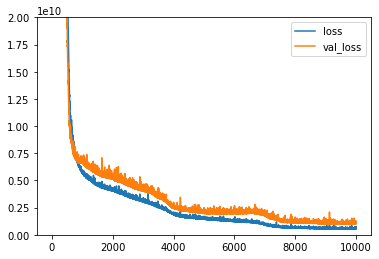

In [70]:
losses.plot()
plt.ylim(0,20000000000)

## model ewaluation

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [50]:
X_test

array([[0.54400699, 0.66263183, 0.02474312, ..., 0.        , 0.        ,
        0.23636364],
       [0.13261117, 0.89055728, 0.01598016, ..., 0.        , 0.        ,
        0.01349948],
       [0.53106439, 0.72986771, 0.01055336, ..., 0.        , 0.        ,
        0.22179309],
       ...,
       [0.57657051, 0.27890778, 0.0199613 , ..., 0.        , 0.        ,
        0.41919192],
       [0.45549595, 0.55965368, 0.03393977, ..., 0.        , 0.        ,
        0.07373737],
       [0.52553676, 0.67988904, 0.05743739, ..., 0.        , 0.        ,
        0.29292929]])

In [51]:
predictions = model.predict(X_test)

In [52]:
mean_absolute_error(y_test,predictions)

16112.086985075519

In [53]:
np.sqrt(mean_squared_error(y_test,predictions))

32509.337545430033

In [54]:
explained_variance_score(y_test,predictions)

0.998197336191751

In [55]:
frame['price'].mean()

455134.17427204375

In [56]:
frame['price'].median()

202000.0

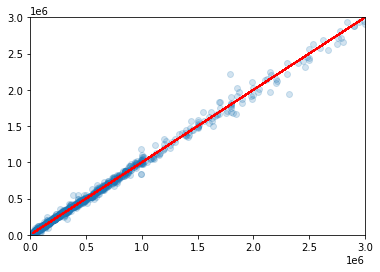

In [71]:
# plt.figure(figsize=(7,7))
plt.xlim(0,3000000)
plt.ylim(0,3000000)

# Our predictions
plt.scatter(y_test,predictions,edgecolor=None,alpha=0.2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [58]:
errors = y_test.reshape(1829, 1) - predictions

<AxesSubplot:ylabel='Count'>

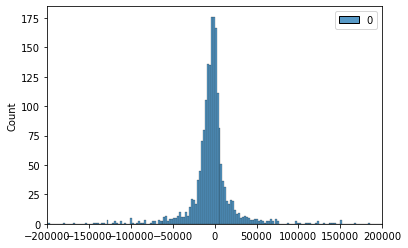

In [64]:
plt.xlim(-200000,200000)

sns.histplot(errors)

In [60]:
predictions

array([[ 619069.44],
       [  29653.06],
       [ 289388.72],
       ...,
       [ 869397.8 ],
       [ 270790.1 ],
       [1616581.8 ]], dtype=float32)

In [61]:
y_test

array([ 610000.,   40000.,  281000., ...,  879750.,  276141., 1632000.])

## saving data

In [72]:
outfile = open('real_estate_data_frame_improved','wb')
pkl.dump(frame,outfile)
outfile.close()

In [77]:
from datetime import datetime
from tensorflow.keras.models import load_model
timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
model.save('models_ann\\' + timestamp)

INFO:tensorflow:Assets written to: models_ann\2020-12-06--14-12\assets


In [81]:
import joblib
joblib.dump(scaler, 'scaler')

['scaler']